## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing necessary libraries

In [97]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [98]:
# to load and manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# to split data into training and test sets
from sklearn.model_selection import train_test_split

# to build decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# to tune different models
from sklearn.model_selection import GridSearchCV

# to compute classification metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)

## Loading the dataset

In [99]:
# loading data into a pandas dataframe
customer_details = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AIMLCourse/Machine_Learning/Project02/Loan_Modelling.csv")

In [100]:
# Create a copy of data
data = customer_details.copy()

## Data Overview

* Observations
* Sanity checks

### Viewing the first and last 5 rows of the dataset

In [101]:
data.head(5)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [102]:
data.tail(5)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

### Checking shape of the dataset

In [103]:
data.shape

(5000, 14)

The dataset has 5000 rows and 14 columns.

### Checking the attribute types

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB




*   There are all 14 columns of numerical data.
*   Education, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard are interpreted here as numerical, are categorial variables that are encoded by default.
*   Seems there no null value in any data columns



In [105]:
# Looking at the data ID column is not needed so it can be dropped
data.drop('ID', axis=1, inplace=True)

### Checking statistical summary

In [106]:
data.describe(include='all').T

count          mean          std      min      25%  \
Age                 5000.0     45.338400    11.463166     23.0     35.0   
Experience          5000.0     20.104600    11.467954     -3.0     10.0   
Income              5000.0     73.774200    46.033729      8.0     39.0   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.0   
Family              5000.0      2.396400     1.147663      1.0      1.0   
CCAvg               5000.0      1.937938     1.747659      0.0      0.7   
Education           5000.0      1.881000     0.839869      1.0      1.0   
Mortgage            5000.0     56.498800   101.713802      0.0      0.0   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.0   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.0   
CD_Account          5000.0      0.060400     0.238250      0.0      0.0   
Online              5000.0      0.596800     0.490589      0.0      0.0   
CreditCard          5000.0      0.294000     0.455637      0.0      0.0   

                        50%      75%      max  
Age                    45.0     55.0     67.0  
Experience             20.0     30.0     43.0  
Income                 64.0     98.0    224.0  
ZIPCode             93437.0  94608.0  96651.0  
Family                  2.0      3.0      4.0  
CCAvg                   1.5      2.5     10.0  
Education               2.0      3.0      3.0  
Mortgage                0.0    101.0    635.0  
Personal_Loan           0.0      0.0      1.0  
Securities_Account      0.0      0.0      1.0  
CD_Account              0.0      0.0      1.0  
Online                  1.0      1.0      1.0  
CreditCard              0.0      1.0      1.0



*   The average age of customer is ~45 years. with a minimum age of 23 and max age of 67 years.
*   The average years of professional experience is ~20.There seems to be an error on the minimum professional experience age (-3 ) which is not valid.
*   Income range from 8K to 224k, The average Annual income of the customer is ~ 74k dollars, 75% of the customers earn around 98K.
*   The average spending on credit cards per month is ~2K dollars.
*   The average Value of house mortgage is ~56k dollars with a standard deviation of 101K




### Checking Anomolies in data
As it can be seen that min value of experience is negative which is not valid. let's fix the data by replacing with +ve value

In [107]:
data['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [108]:
# Checking -ve experience value
data[data['Experience'] < 0]['Experience'].unique()

array([-1, -2, -3])

In [109]:
# Correcting the data by replacing with +ve value
data['Experience'].replace(-1, 1, inplace=True)
data['Experience'].replace(-2, 2, inplace=True)
data['Experience'].replace(-3, 3, inplace=True)

In [110]:
data['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43])

### Check missing and duplicate values

In [111]:
data.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

- There are no missing values in the dataset.

In [112]:
data.duplicated().sum()

0

* There are no duplicate values in the data.

### Check unique values for categorial (Here numerical) variables and understands statistics

In [113]:
data['Securities_Account'].value_counts(normalize=True)

Securities_Account
0    0.8956
1    0.1044
Name: proportion, dtype: float64

*  About 10% customers has security account with the bank

In [114]:
data['CD_Account'].value_counts(normalize=True)

CD_Account
0    0.9396
1    0.0604
Name: proportion, dtype: float64

*  ~93% customers does not have certificate of deposit (CD) account with the bank

In [115]:
data['Online'].value_counts(normalize=True)

Online
1    0.5968
0    0.4032
Name: proportion, dtype: float64

*  Around 60% customers use internet banking facilities

In [116]:
data['CreditCard'].value_counts(normalize=True)

CreditCard
0    0.706
1    0.294
Name: proportion, dtype: float64

*   ~29% customers use a credit card issued by any other Bank (excluding All life Bank)

In [117]:
# Checking number of unique values in zipcode
data['ZIPCode'].unique()

array([91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 93023,
       94710, 90277, 93106, 94920, 91741, 95054, 95010, 94305, 91604,
       94015, 90095, 91320, 95521, 95064, 90064, 94539, 94104, 94117,
       94801, 94035, 92647, 95814, 94114, 94115, 92672, 94122, 90019,
       95616, 94065, 95014, 91380, 95747, 92373, 92093, 94005, 90245,
       95819, 94022, 90404, 93407, 94523, 90024, 91360, 95670, 95123,
       90045, 91335, 93907, 92007, 94606, 94611, 94901, 92220, 93305,
       95134, 94612, 92507, 91730, 94501, 94303, 94105, 94550, 92612,
       95617, 92374, 94080, 94608, 93555, 93311, 94704, 92717, 92037,
       95136, 94542, 94143, 91775, 92703, 92354, 92024, 92831, 92833,
       94304, 90057, 92130, 91301, 92096, 92646, 92182, 92131, 93720,
       90840, 95035, 93010, 94928, 95831, 91770, 90007, 94102, 91423,
       93955, 94107, 92834, 93117, 94551, 94596, 94025, 94545, 95053,
       90036, 91125, 95120, 94706, 95827, 90503, 90250, 95817, 95503,
       93111, 94132,

In [118]:
# Check first 2 digit unique values in zipcode
data['ZIPCode'] = data['ZIPCode'].astype(str)
print(" Number of unique values if we take 1st two digit of zipcode: ", data['ZIPCode'].str[0:2].nunique())

 Number of unique values if we take 1st two digit of zipcode:  7


In [119]:
# Update the data with 1st two digit of zipcode for better analysis
data['ZIPCode'] = data['ZIPCode'].str[0:2]
data['ZIPCode'] = data['ZIPCode'].astype('category')

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   int64   
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   int64   
 9   Securities_Account  5000 non-null   int64   
 10  CD_Account          5000 non-null   int64   
 11  Online              5000 non-null   int64   
 12  CreditCard          5000 non-null   int64   
dtypes: category(1), float64(1), int64(11)
memory usage: 474.1 KB


In [121]:
data.head()

Age  Experience  Income ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25           1      49      91       4    1.6          1         0   
1   45          19      34      90       3    1.5          1         0   
2   39          15      11      94       1    1.0          1         0   
3   35           9     100      94       1    2.7          2         0   
4   35           8      45      91       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

### Univariate Analysis

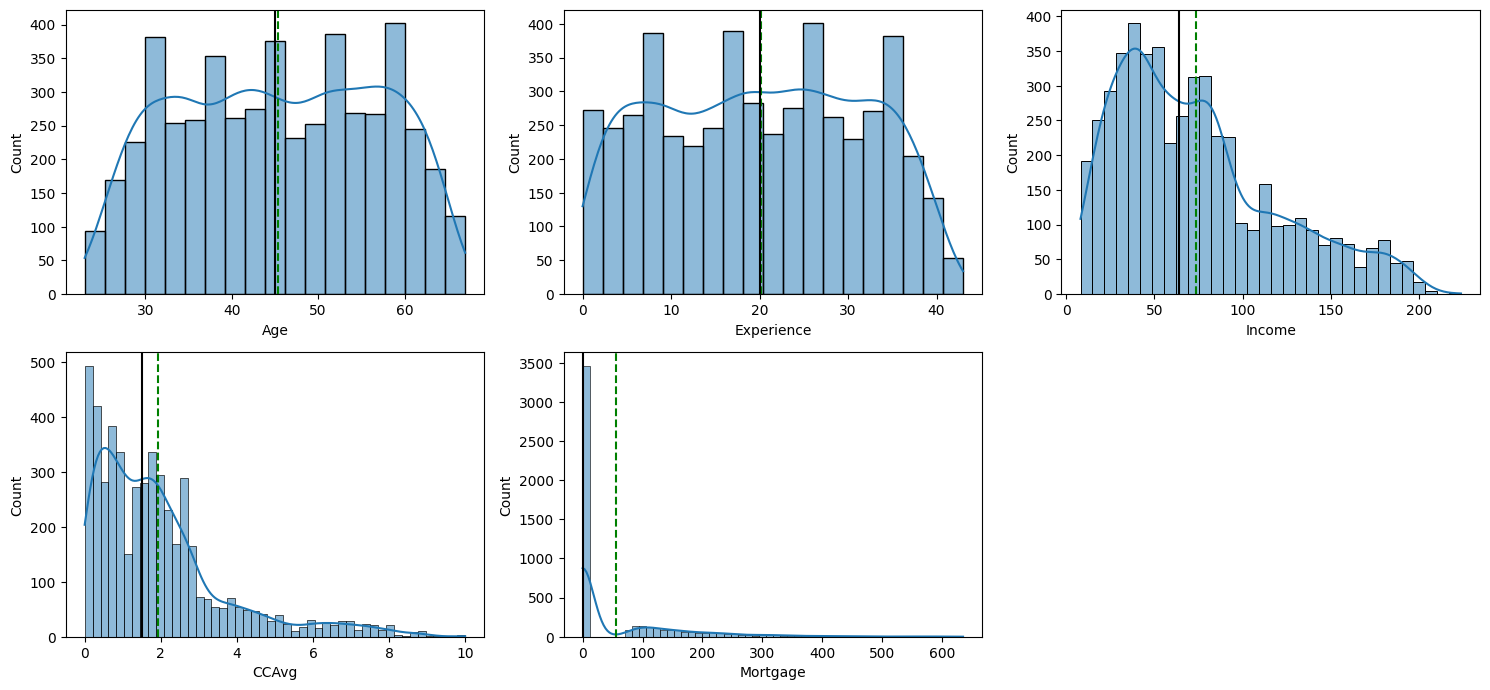

In [122]:
# defining the figure size
plt.figure(figsize=(15,10))

# defining the list of numerical feature to plot
num_features = ['Age','Experience','Income','CCAvg','Mortgage']

# plotting the histogram for each numerical feature
for i, feature in enumerate(num_features):
  plt.subplot(3,3,i+1)
  sns.histplot(data=data, x=feature, kde=True)
  plt.axvline(data[feature].mean(), color='green', linestyle="--")
  plt.axvline(data[feature].median(), color="black", linestyle="-")
plt.tight_layout();


*  **Age** and **Experience** shows somewhat normal distribution with peaks at certain points. Age with mean and median around 45 years and Experience with mean and median around 20 years
*  **Income**: shows slightly right skewed distribution indicating more people have incomes on the lower end and avg income around 73K.
*  **CCAvg**: average spending on credit cards per months shows right skewed disrtibution showing many people with credit card usage below 2.5k. Average spending ~2k per month.
*  **Mortgage**: A highly right-skewed distribution, with many people having no or low mortgages.


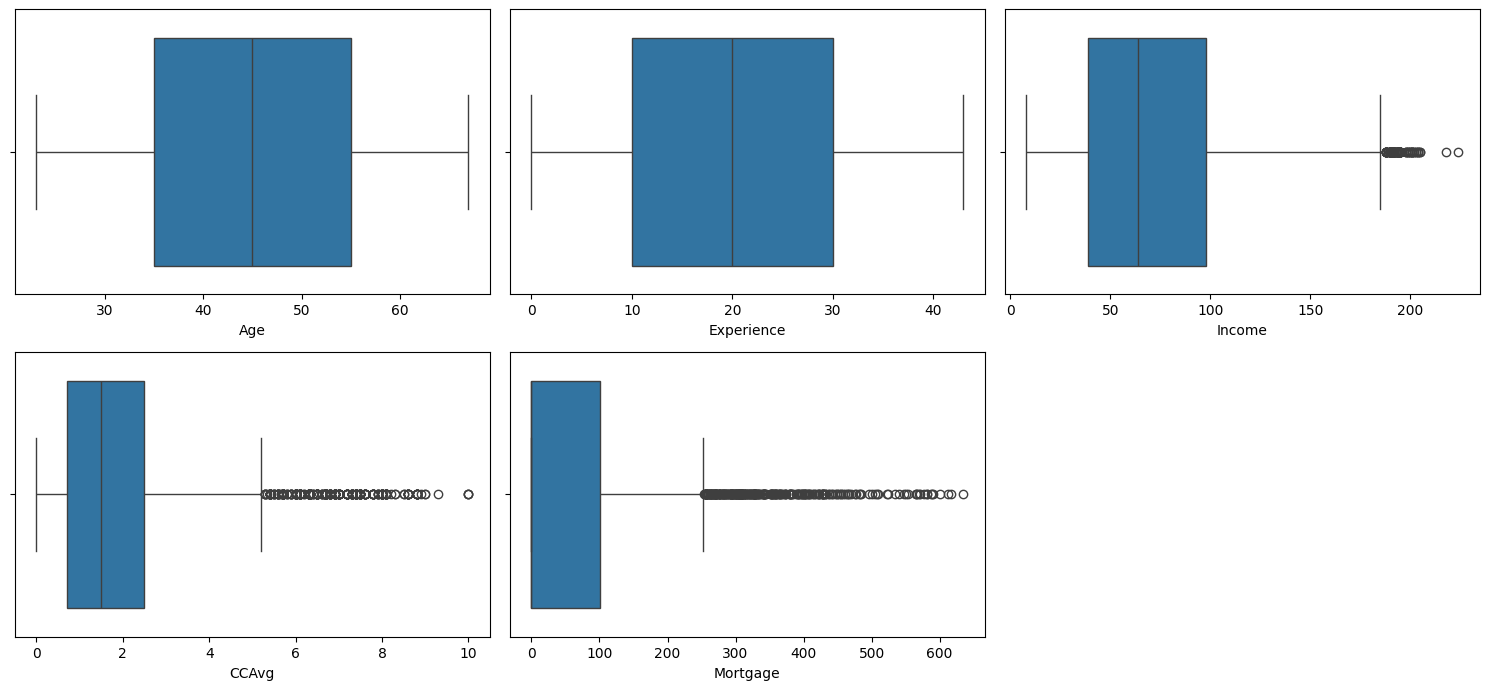

In [123]:
# defining the figure size
plt.figure(figsize=(15, 10))

# plotting the boxplot for each numerical feature
for i, feature in enumerate(num_features):
    plt.subplot(3, 3, i+1)    # assign a subplot in the main plot
    sns.boxplot(data=data, x=feature)    # plot the histogram

plt.tight_layout();    # to add spacing between plots

-  **Age**: The boxplot shows no apparent outliers, with the median age around 45. The interquartile range (IQR) spans approximately 35 to 55 years.

- **Experience**: Similar to age, the experience distribution also has no outliers, with the median around 20 years and a wide IQR from 10 to 30 years.

-  **Income**: There are several outliers at the higher end (above 180k) also with the median income slightly below 70k.

-  **CCAvg**: This boxplot shows a large number of outliers at the higher end, above 5. The median usage is around 1.5k, and 75% of the data points fall below 2.5k.

-  **Mortgage**: There are numerous outliers, with many values exceeding above 250k. The majority of mortgages are clustered near zero, with the median likely nearby 0.

In [124]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        legend=False,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show();  # show the plot

In [125]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [126]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0])

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False
    )

    plt.tight_layout()
    plt.show()

#### Observations on Family

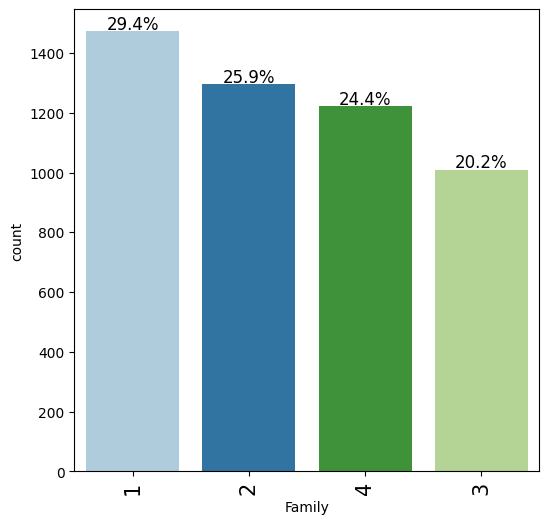

In [127]:
labeled_barplot(data, 'Family', perc=True)

*  Around 30% families consists 1 family member,~26% are of 2 family members, followed by ~25% are of 4 family members and ~20% has 2 family members.

#### Observations on Education

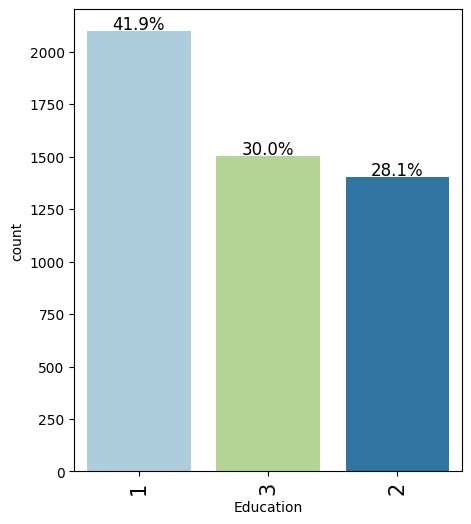

In [128]:
labeled_barplot(data, 'Education', perc=True)

*  As per the education barplot around majority i.e. 42% customers are undergrad, ~28% are graduated and 30% are Advanced/Professional

#### Observations on Security Account

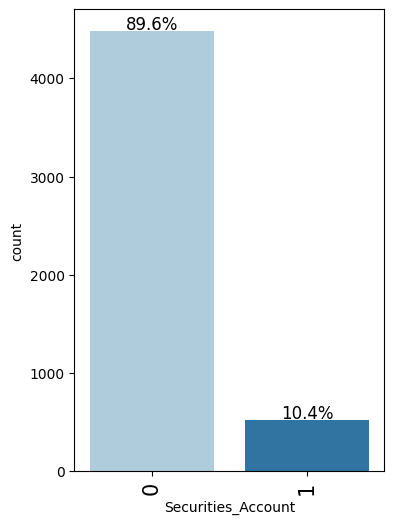

In [129]:
labeled_barplot(data, 'Securities_Account', perc=True)

*  ~90% customers does not have Securities account with the bank.

#### Observations on CD Account

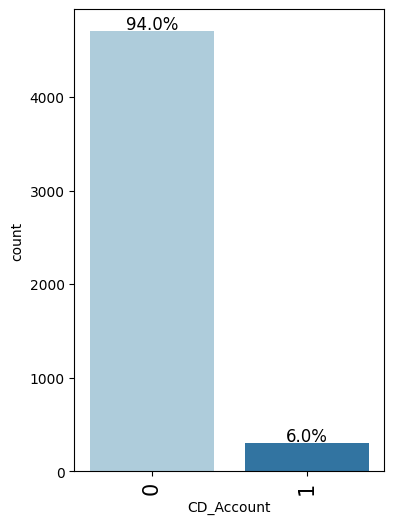

In [130]:
labeled_barplot(data, 'CD_Account', perc=True)

*  6% customers have a certificate of deposit (CD) account with the bank.

#### Observations on Online

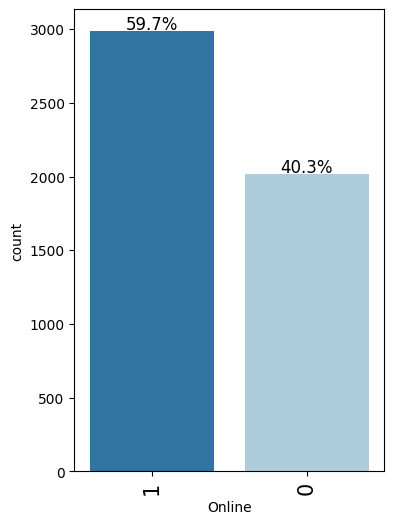

In [131]:
labeled_barplot(data, 'Online', perc=True)

*  Around 60% of the customers use online banking

#### Observations on CreditCard

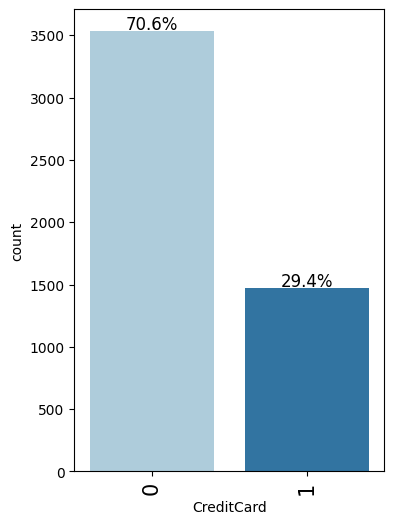

In [132]:
labeled_barplot(data, 'CreditCard', perc=True)

*  ~70% customers does not use a credit card issued by any other Bank (excluding All life Bank)

#### Observation on ZIPCode

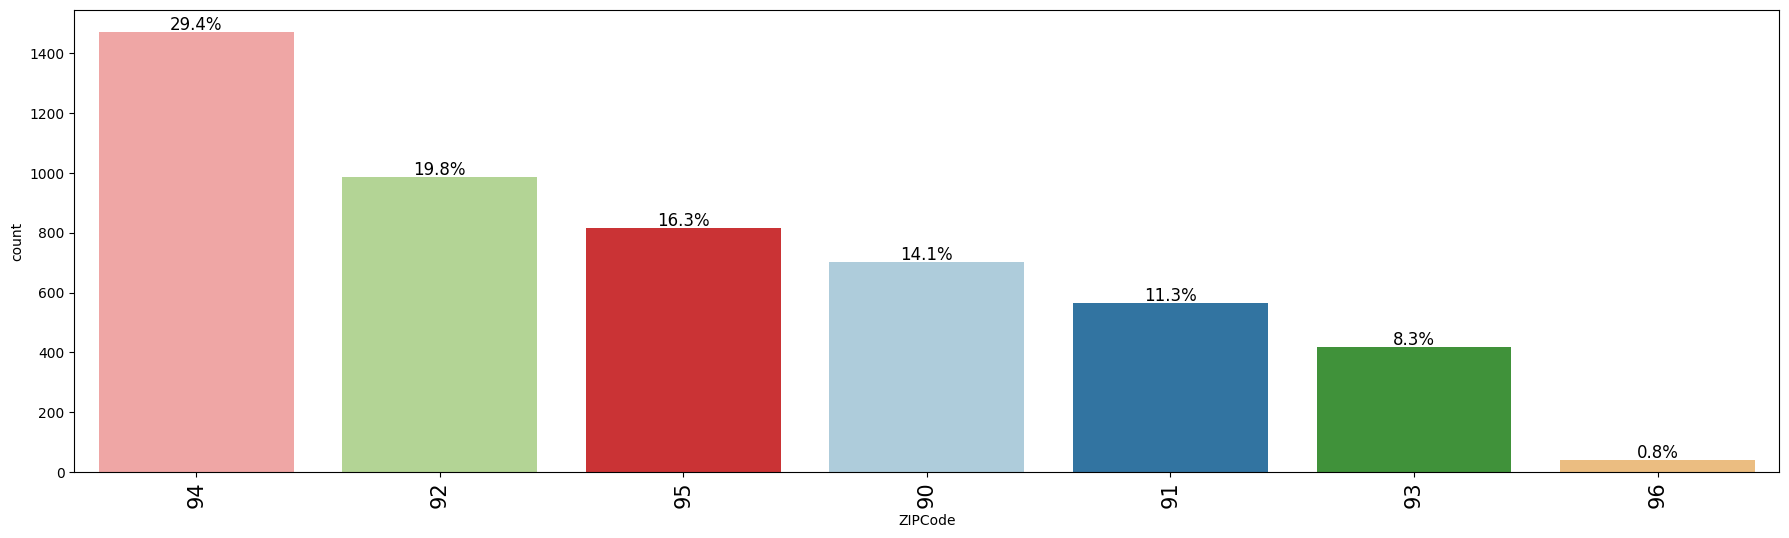

In [133]:
labeled_barplot(data, 'ZIPCode', perc=True, n=20)

*  Around 295% of customers are from Zipcode starting with 94
*  Zipcode starts with 96 has least customers

#### Observation on Personal Loan

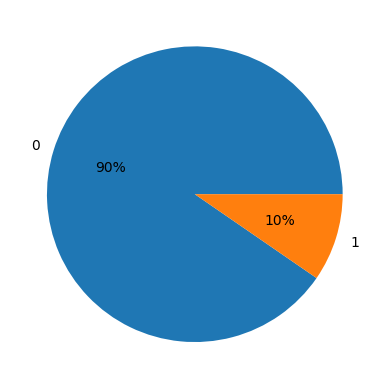

In [134]:
# data['Personal_Loan'].value_counts(normalize=True)
loan_stats =pd.DataFrame( data['Personal_Loan'].value_counts(normalize=True)).reset_index()
loan_stats.columns =["Labels","Personal Loan"]
plt.pie(loan_stats['Personal Loan'], labels=loan_stats['Labels'],autopct='%.0f%%' );

*   Around 10% customers accepted the personal loan offered in last campaign, while ~90% did not.

### Bivariate Analysis

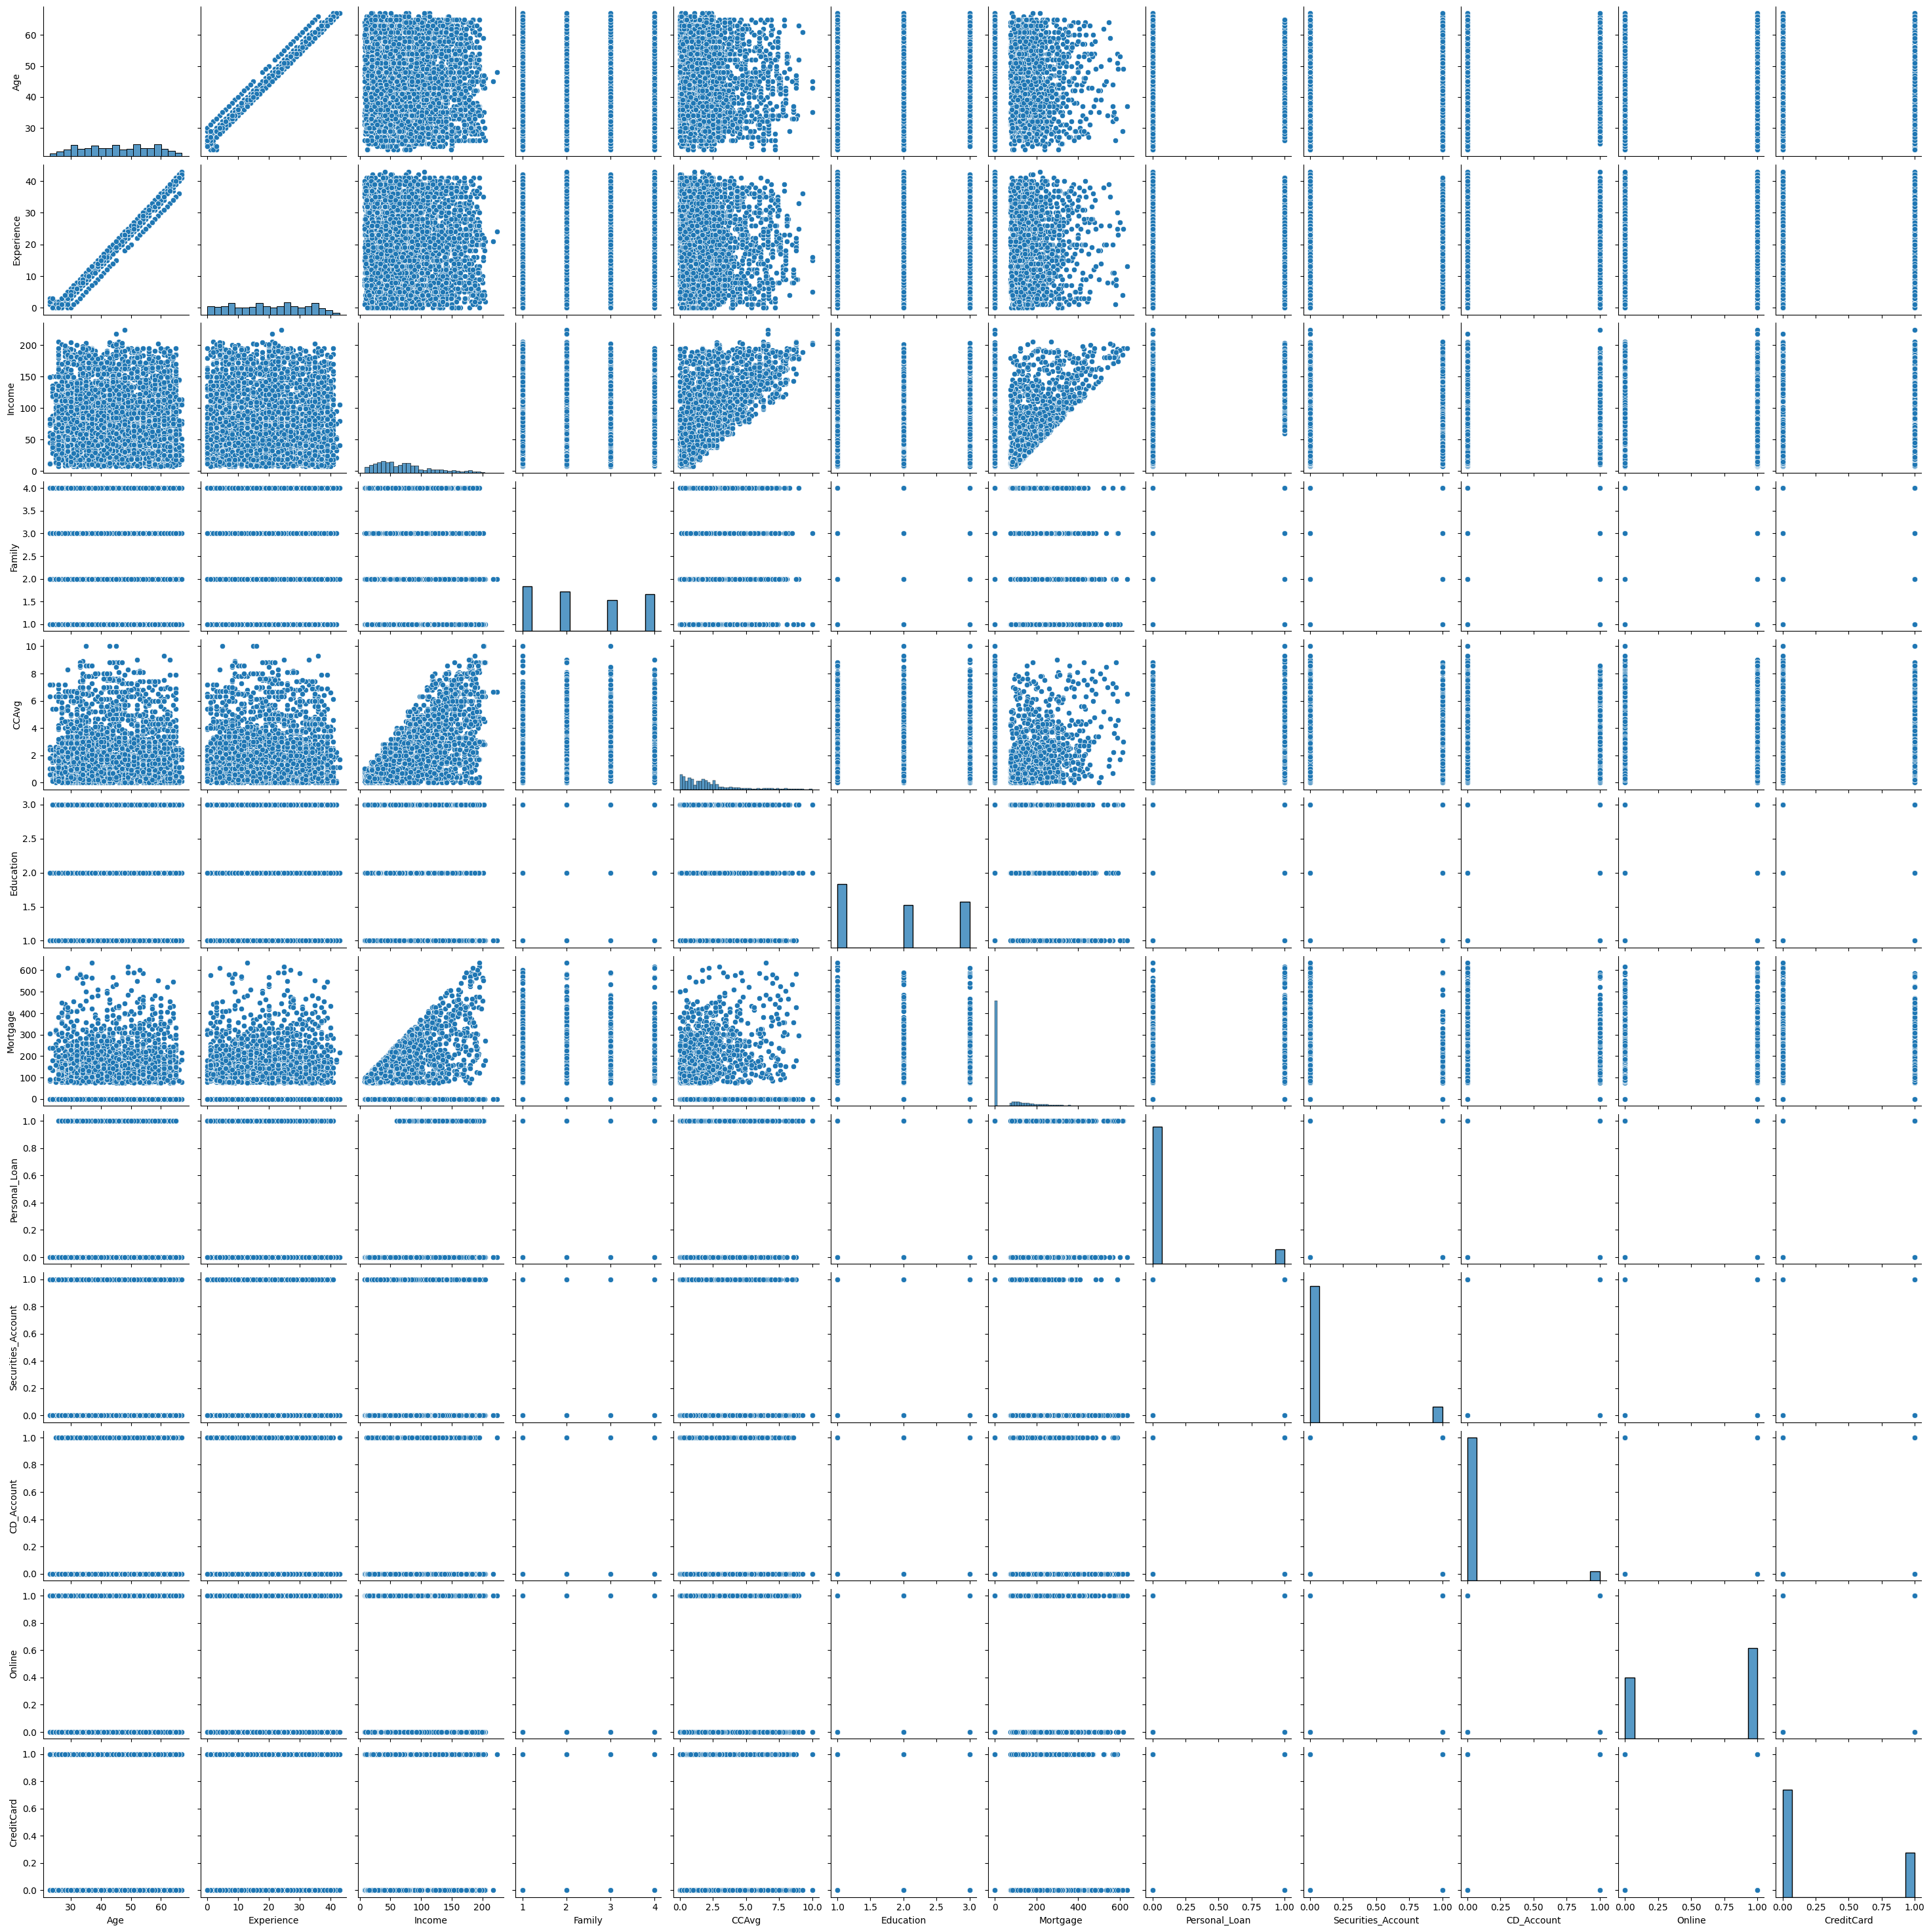

In [135]:
sns.pairplot(data)

*  Experience and Age are strongly correlated
*  Family and Eductaion have a relatively low correlation with Personal_Loan


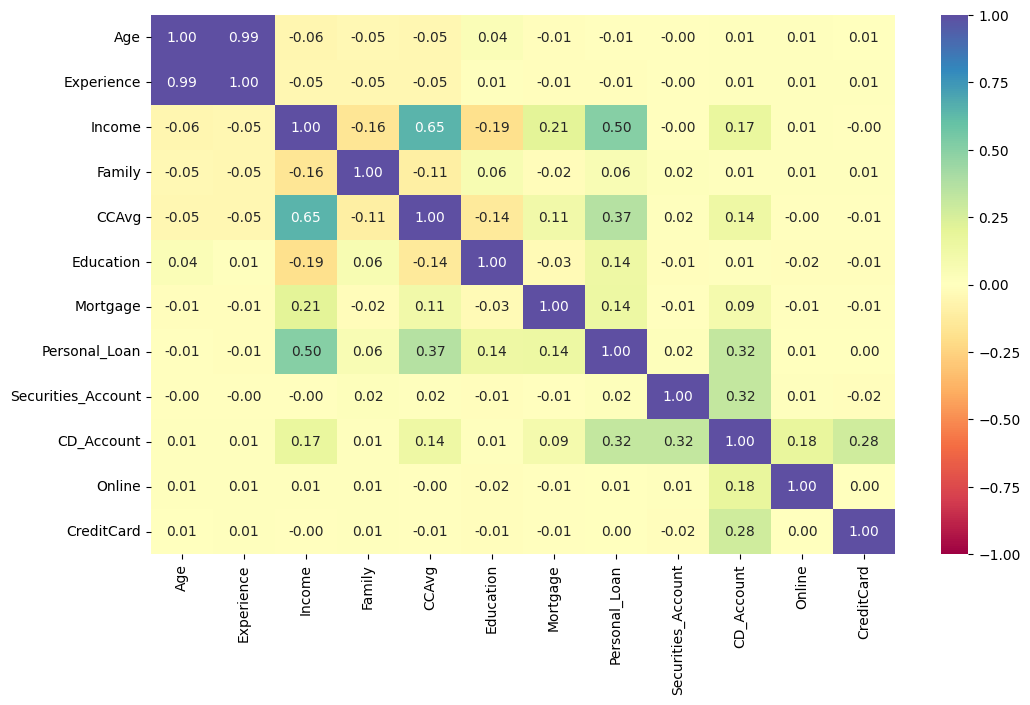

In [136]:
cols_list = data.select_dtypes(include=['number']).columns.tolist()
plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

*  As per the heatmap Age & Experience shows very strong relationship almost coefficient value of 1
*  Income and CC average per month shows strong postive relationship.
*  Income and personal loan is also positively correlated
*  We observe a low but moderate correlation between mortgage and income

#### Check how customer's interest in purchasing a loan vary with other attributes

##### Personal loan vs Age

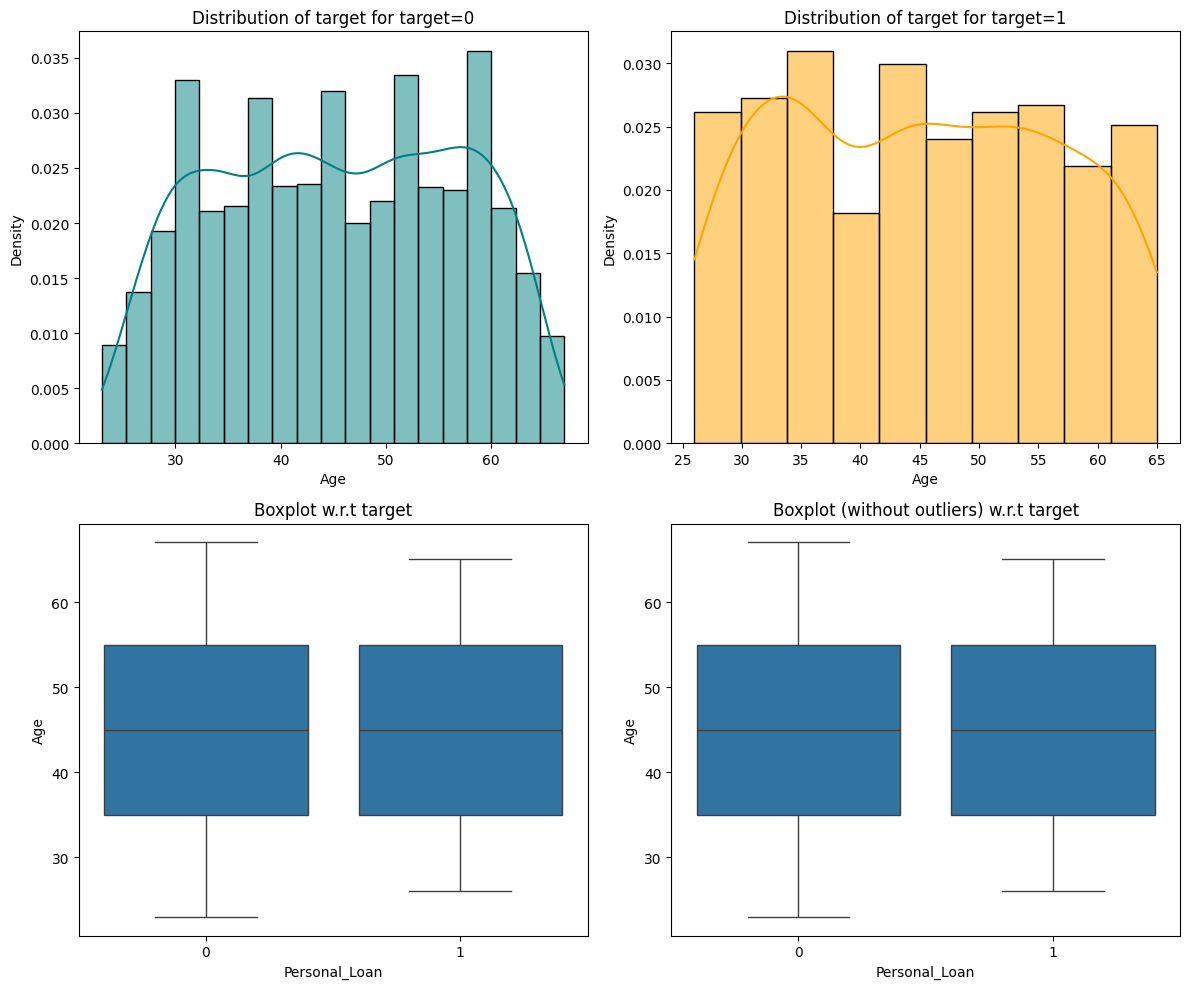

In [137]:
distribution_plot_wrt_target(data, 'Age', 'Personal_Loan')

*  Most of the customer accepted the Personal loan offered in last campain are from age group of 35 to 55 Years

##### Personal Loan vs CD Account

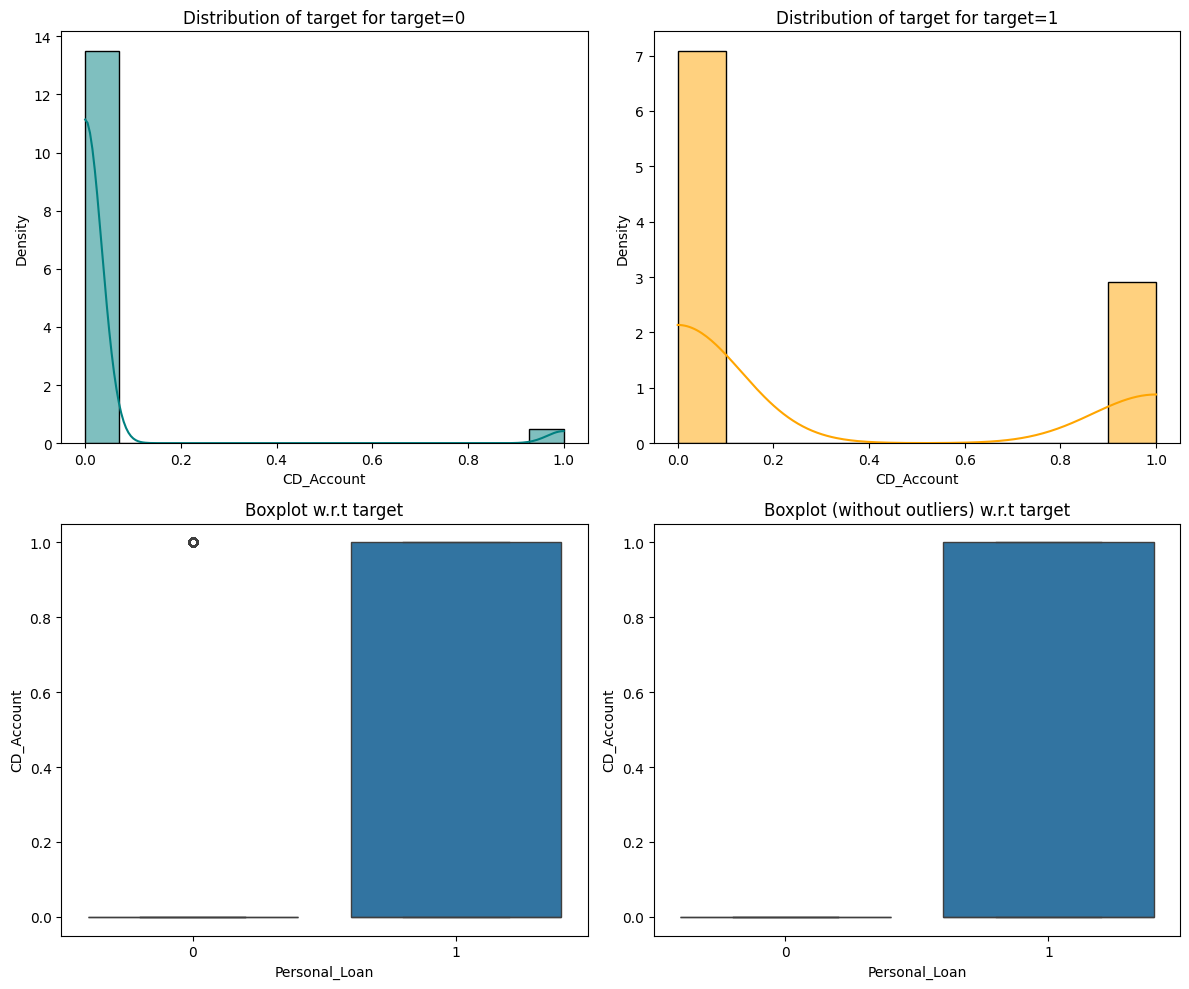

In [138]:
distribution_plot_wrt_target(data, 'CD_Account', 'Personal_Loan')

*  Customers with CD Account tend to accept personal loan facility more than customers without

##### Personal loan vs Experience

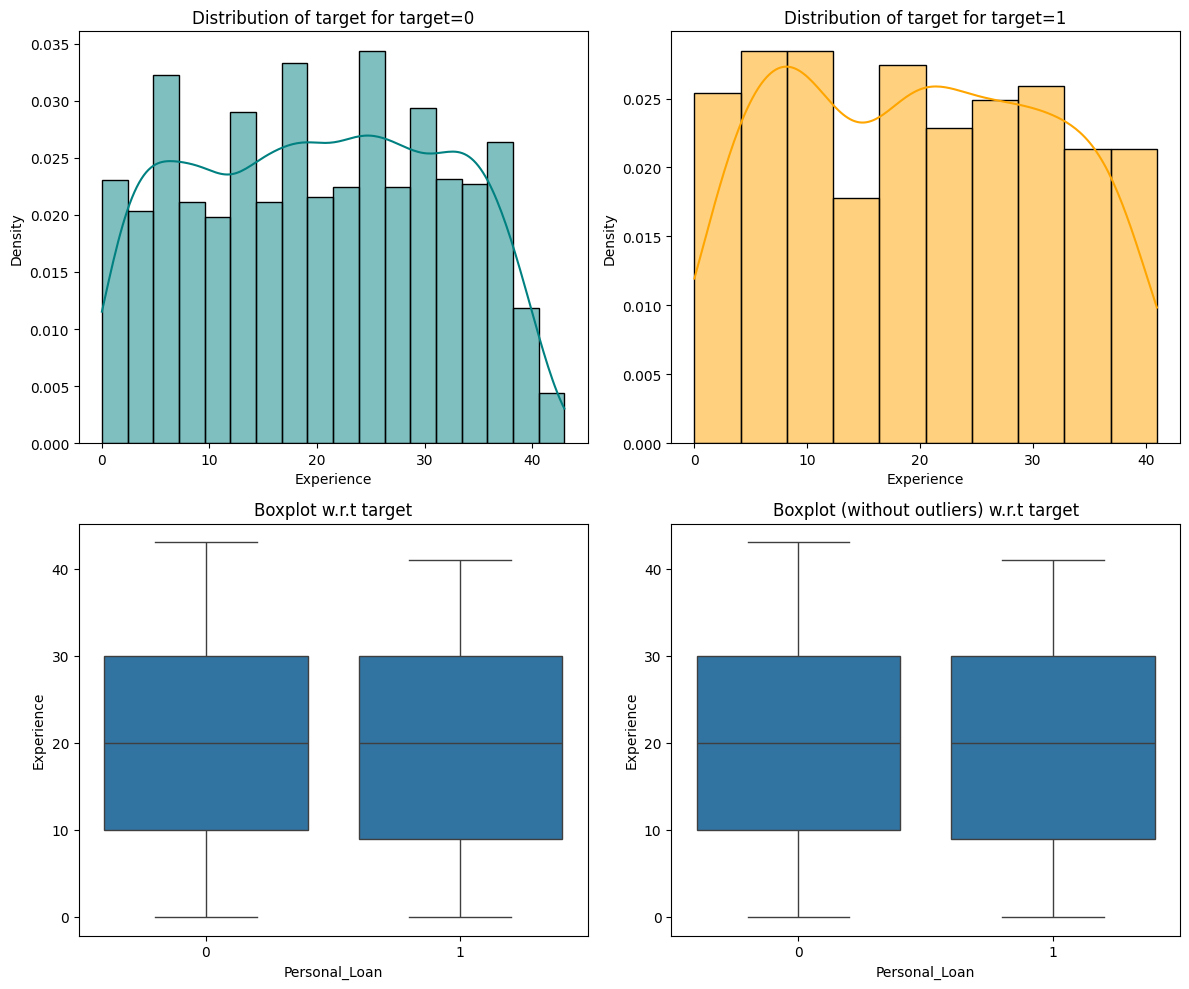

In [139]:
distribution_plot_wrt_target(data, 'Experience', 'Personal_Loan')

*  Most of the customers accepted personal loan in last campain are having experience between 10 to 30 years


##### Personal loan vs Education

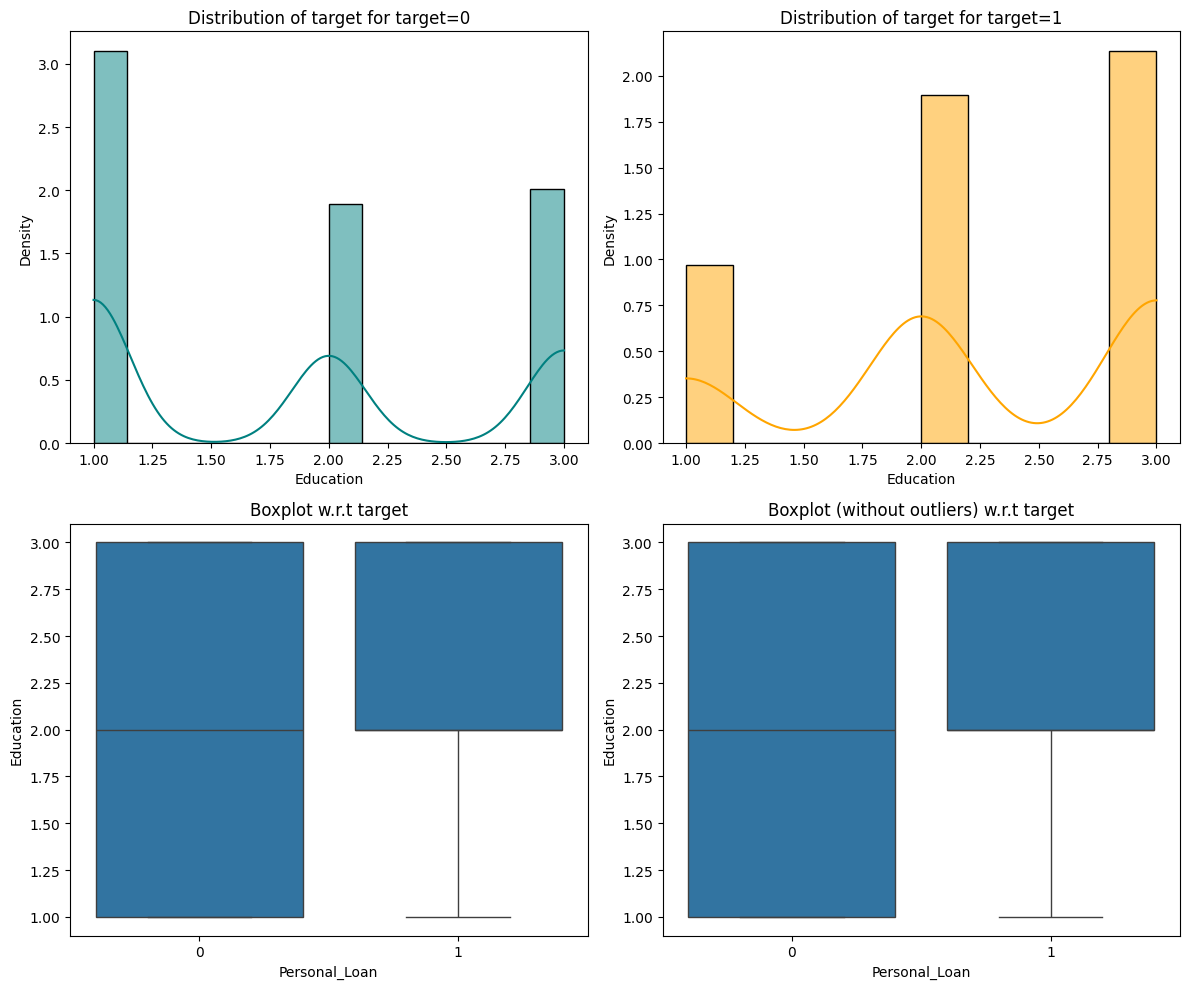

In [140]:
distribution_plot_wrt_target(data, 'Education', 'Personal_Loan')

In [141]:
data.groupby(['Education'])['Personal_Loan'].value_counts(normalize=True)

Education  Personal_Loan
1          0                0.955630
           1                0.044370
2          0                0.870278
           1                0.129722
3          0                0.863424
           1                0.136576
Name: proportion, dtype: float64

*  Out of who has accepted loan offer, those have Advanced/Proffesional education and followed by Graduate customers.
*  Undergrads have negligible % who has accepted the offer in last campaign

##### Personal Loan vs Income

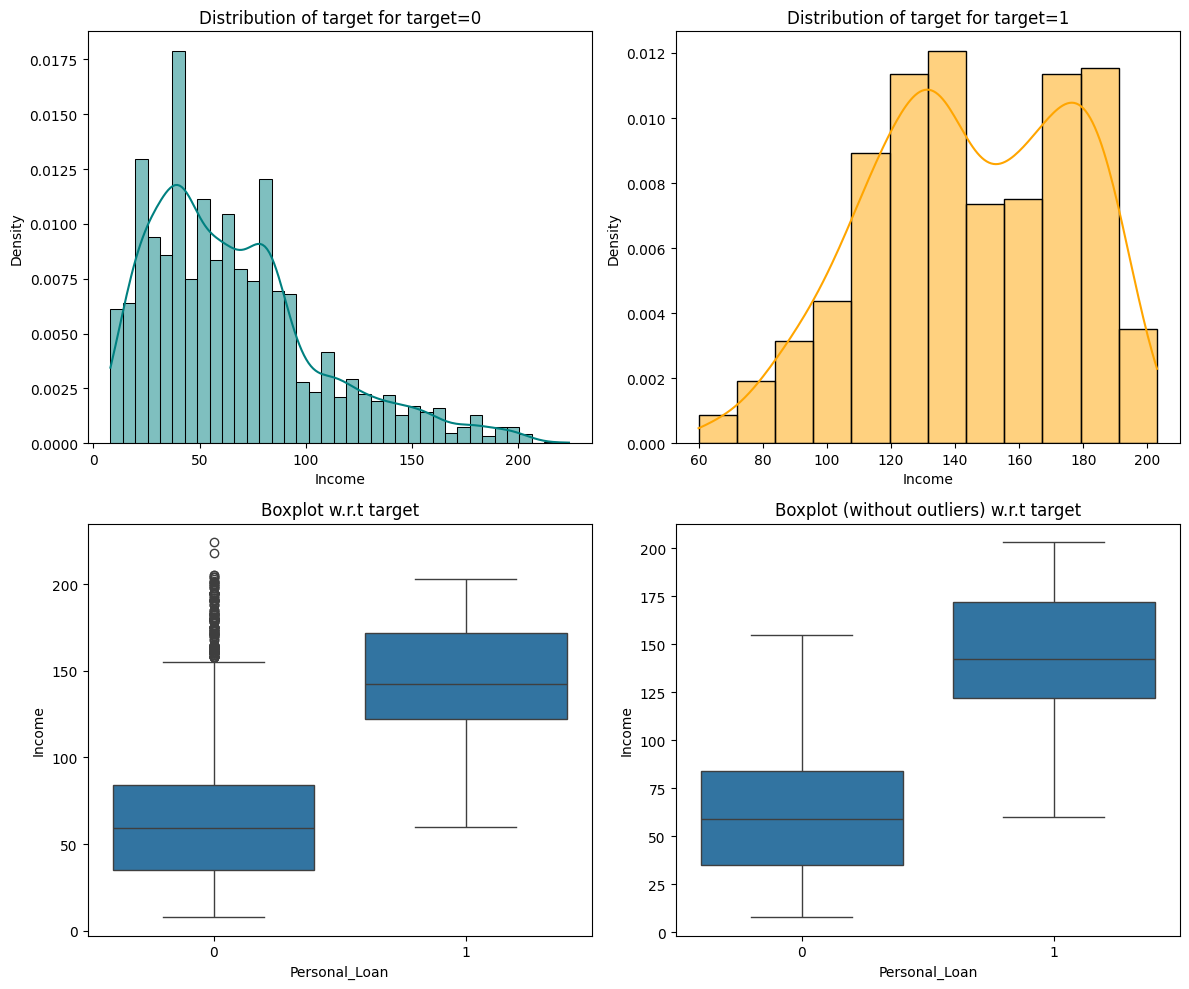

In [142]:
distribution_plot_wrt_target(data, 'Income', 'Personal_Loan')

*  It can be clearly seen than customers with higher income has accepted personal loan offer in last campaign

##### Personal Loan vs CCAvg

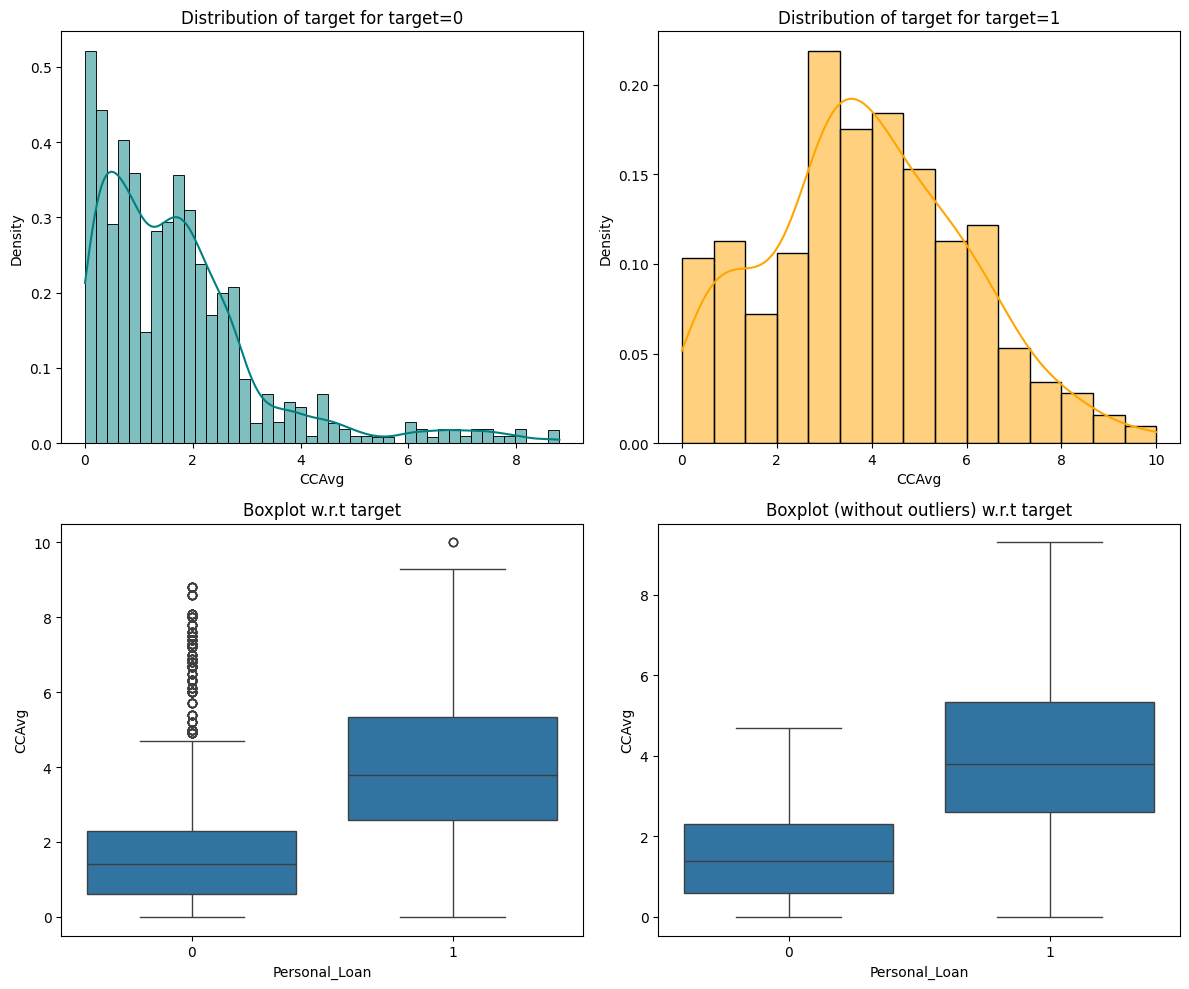

In [143]:
distribution_plot_wrt_target(data, 'CCAvg', 'Personal_Loan')

*  Customer with higher credit card spendings per month (most of them with more 2k) has accepted the personal loan.

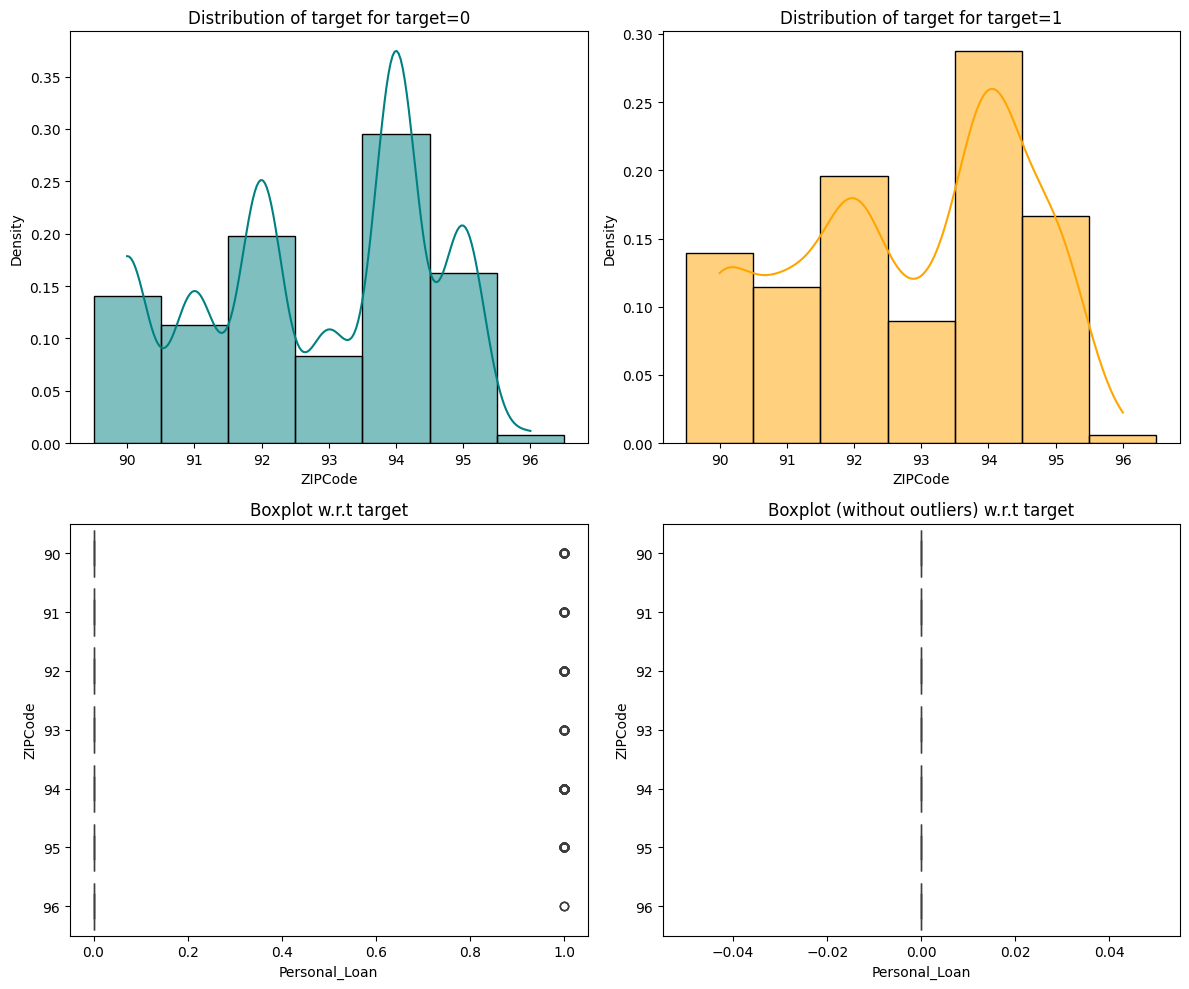

In [144]:
distribution_plot_wrt_target(data, 'ZIPCode', 'Personal_Loan')

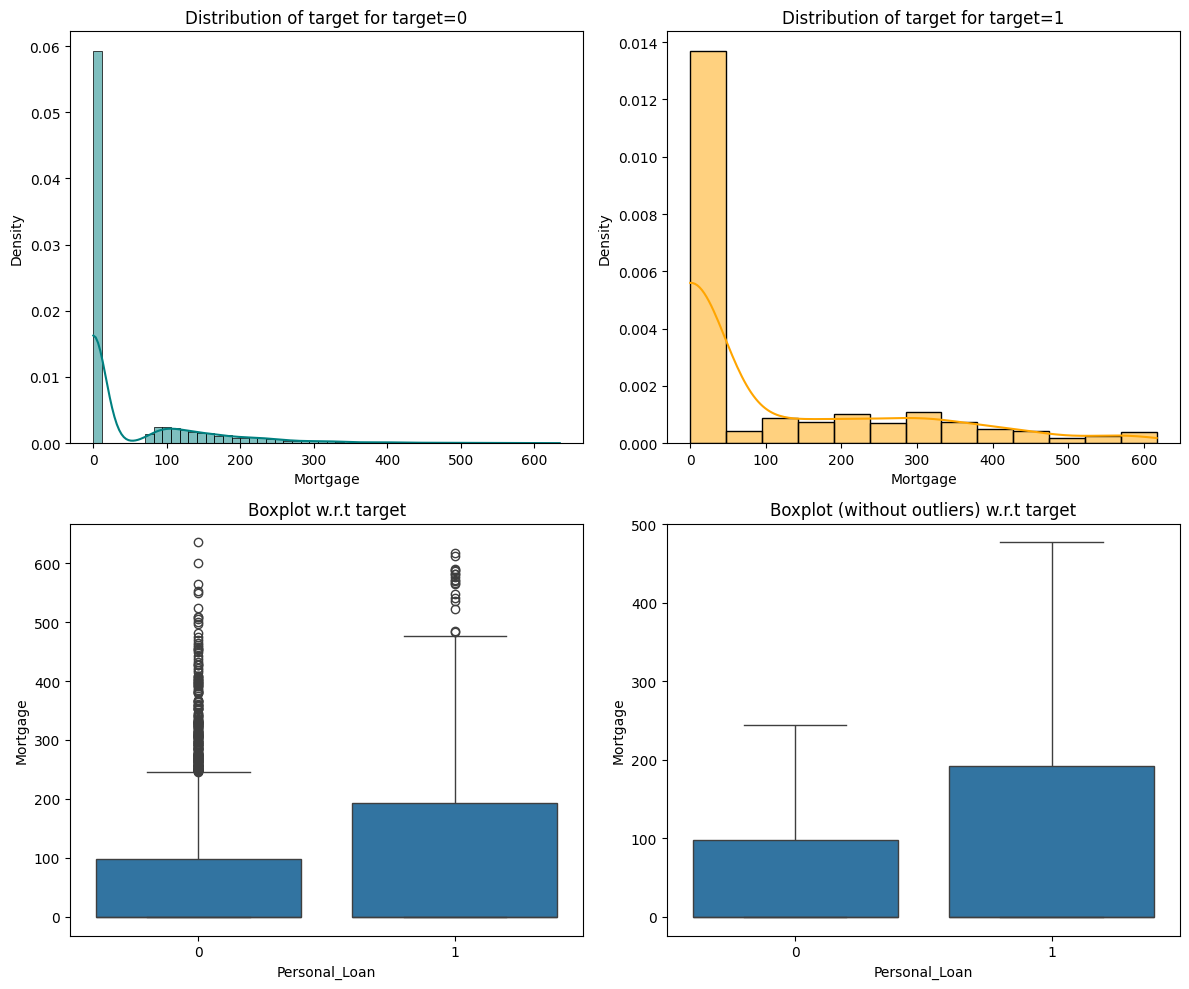

In [145]:
distribution_plot_wrt_target(data, 'Mortgage', 'Personal_Loan')

*  Customers with Mortgage facility are most likely to accept personal loans than those without.

#### Key Observations from EDA
*  Age is normally distributed as observed earlier, Most of the customer accepted the person loan offer are from age group of 35 to 55. It seems to have almost same number of customer who has accepted and not accepted the loan offer.
*  In Experience point of view majority of customers accepting loans having a professional experience of 10 to 30 years.
*  Customers with higher income (income mostly more than 100k) accpeting loan offer than those with lower incomes.
*  Customer with family members more than 2 are likely to accept the loan offer than those with family member less than 2
*  Customer with credit card spending moren than 2k are likely to accept the loan offer
*  Mostly Graduate and Avdanced/Proffesional education level customers are tend to take personal loan offer.
*  Customers with Mortgage facility are most likely to accept personal loans than those without.
*  Customers with CD Account tend to accept personal loan facility more than customers without CD account
*  From the heat map, We observe a high correlation between Age and experience
*  Income and CC average per month shows strong postive relationship.
*  Income and personal loan is also positively correlated
*  We observe a low but moderate correlation between mortgage and income

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

##### Detecting outliers

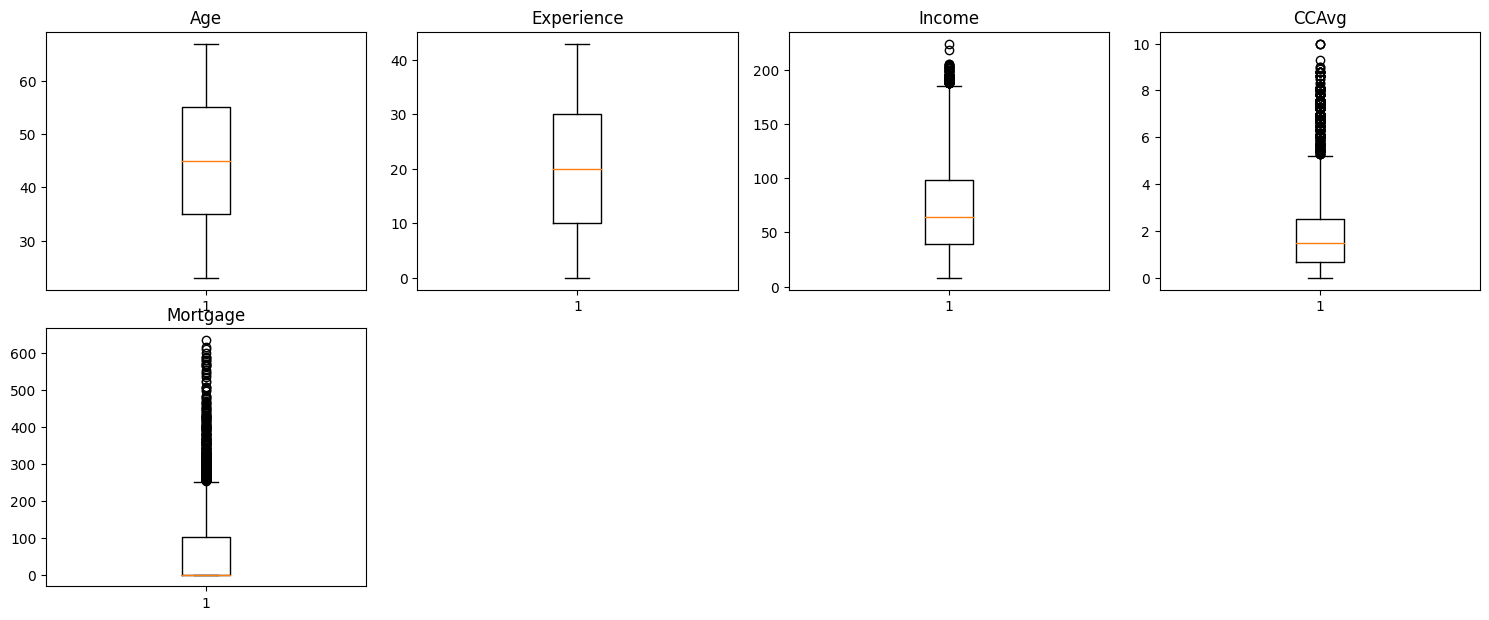

In [146]:
# outlier detection using boxplot

plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_features):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [147]:

# Find 25th percentile and 75th percentile
Q1 = data[num_features].quantile(0.25)
Q3 = data[num_features].quantile(0.75)

# Calculate Inter Quantile Range
IQR = Q3 - Q1

#Finding upper and lower quantile
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [148]:
# Calculate outliers for each column (using element-wise comparison) for numeric columns
outliers = (data[num_features] < lower) | (data[num_features] > upper)

# Calculate the percentage of outliers in each column
outliers_percentage = (outliers.sum() / len(data)) * 100

# Display the percentage of outliers for each column
print(outliers_percentage)

Age           0.00
Experience    0.00
Income        1.92
CCAvg         6.48
Mortgage      5.82
dtype: float64


In [149]:
outliers.sum()

Age             0
Experience      0
Income         96
CCAvg         324
Mortgage      291
dtype: int64

In [150]:
data[data['CCAvg'] > upper['CCAvg']]

Age  Experience  Income ZIPCode  Family  CCAvg  Education  Mortgage  \
9      34           9     180      93       1   8.90          3         0   
18     46          21     193      91       2   8.10          3         0   
44     46          20     104      94       1   5.70          1         0   
55     41          17     139      94       2   8.00          1         0   
61     47          21     125      93       1   5.70          1       112   
...   ...         ...     ...     ...     ...    ...        ...       ...   
4908   40          16     138      92       2   6.10          1         0   
4911   46          22     153      94       2   7.50          1         0   
4937   33           8     162      94       1   8.60          1         0   
4980   29           5     135      95       3   5.30          1         0   
4993   45          21     218      91       2   6.67          1         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
9                 1                   0           0       0           0  
18                1                   0           0       0           0  
44                0                   0           0       1           1  
55                0                   0           0       1           0  
61                0                   1           0       0           0  
...             ...                 ...         ...     ...         ...  
4908              0                   0           0       1           0  
4911              0                   0           0       0           0  
4937              0                   0           1       1           1  
4980              1                   0           1       1           1  
4993              0                   0           0       1           0  

[324 rows x 13 columns]

*  There are some outliers in data but as it seems to be valid values we will not treat them.

### Preparing data for modeling

In [151]:
# Dropping Personal loan(target variable) and Experience column from data as experience is strongly/perfectly correlated with Age
X = data.drop(['Personal_Loan', 'Experience'], axis=1)
Y = data['Personal_Loan']

# Get dummy columns for categorial features
X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)
X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [152]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**
*   Predictig a customer will not accept the personal loan offer but in reality, customer will accept (FN)
*   Predicting a customer will accept the personal loan offer but in reality, customer will not accept (FP)

**Which case is more important**
*   If we predict customer will not accept the offer but in reality customer will accept then bank might have chance to lose the potential customer to reach out
*   If we predict customer will accept the loan offer but in reality customer will not then Bank's expenditure on marketing resources will be considered as loss
*   In this scenario losing a potential customer is a bigger loss compare to losing the resources cost.  

**How to reduce the losses?**
*  The Bank would want to reduce false negatives i.e. maximize the recall, greater the recall score higher the chance of minimizing false negatives. Which will give less false positive and less chances of losing potential customer.
*  Along with this we have to consider the moderate precision so as to minimize false positive and end up with minimum loss for expenditure on marketing resources.

In [153]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [154]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building

#### Decision Tree (Default sklearn)

In [155]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

##### Checking model performance on training data


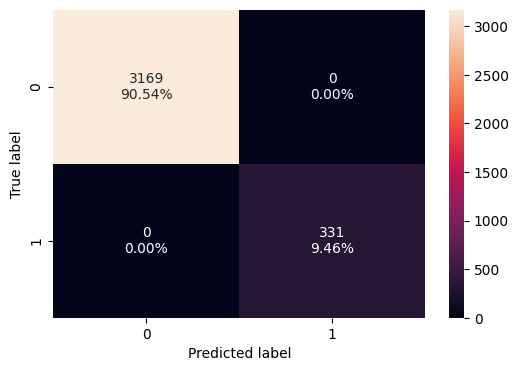

In [156]:
# Confusion matrix
confusion_matrix_sklearn(model, X_train, y_train)

In [157]:
# compute different metrics to check performance on training set
default_decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
default_decision_tree_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0



*   Model is able to perfectly classify all the data points on the training set.
*   0 errors on the training set, each sample has been classified correctly.
*   As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
*  This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.



Checking model performance on testing data

In [158]:
# compute different metrics to check performance
default_decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
default_decision_tree_perf_test

Accuracy    Recall  Precision        F1
0     0.986  0.932886   0.926667  0.929766

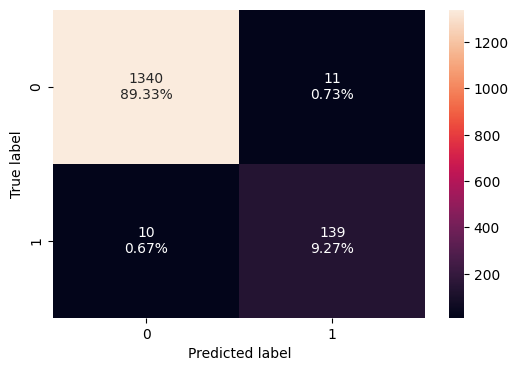

In [159]:
# Confusion matrix
confusion_matrix_sklearn(model, X_test, y_test)

*  The difference in performance metrics shows the model is overfitting and it needs to optimize to give generalized performance on training and test data sets

##### Visualizing the default Decision Tree


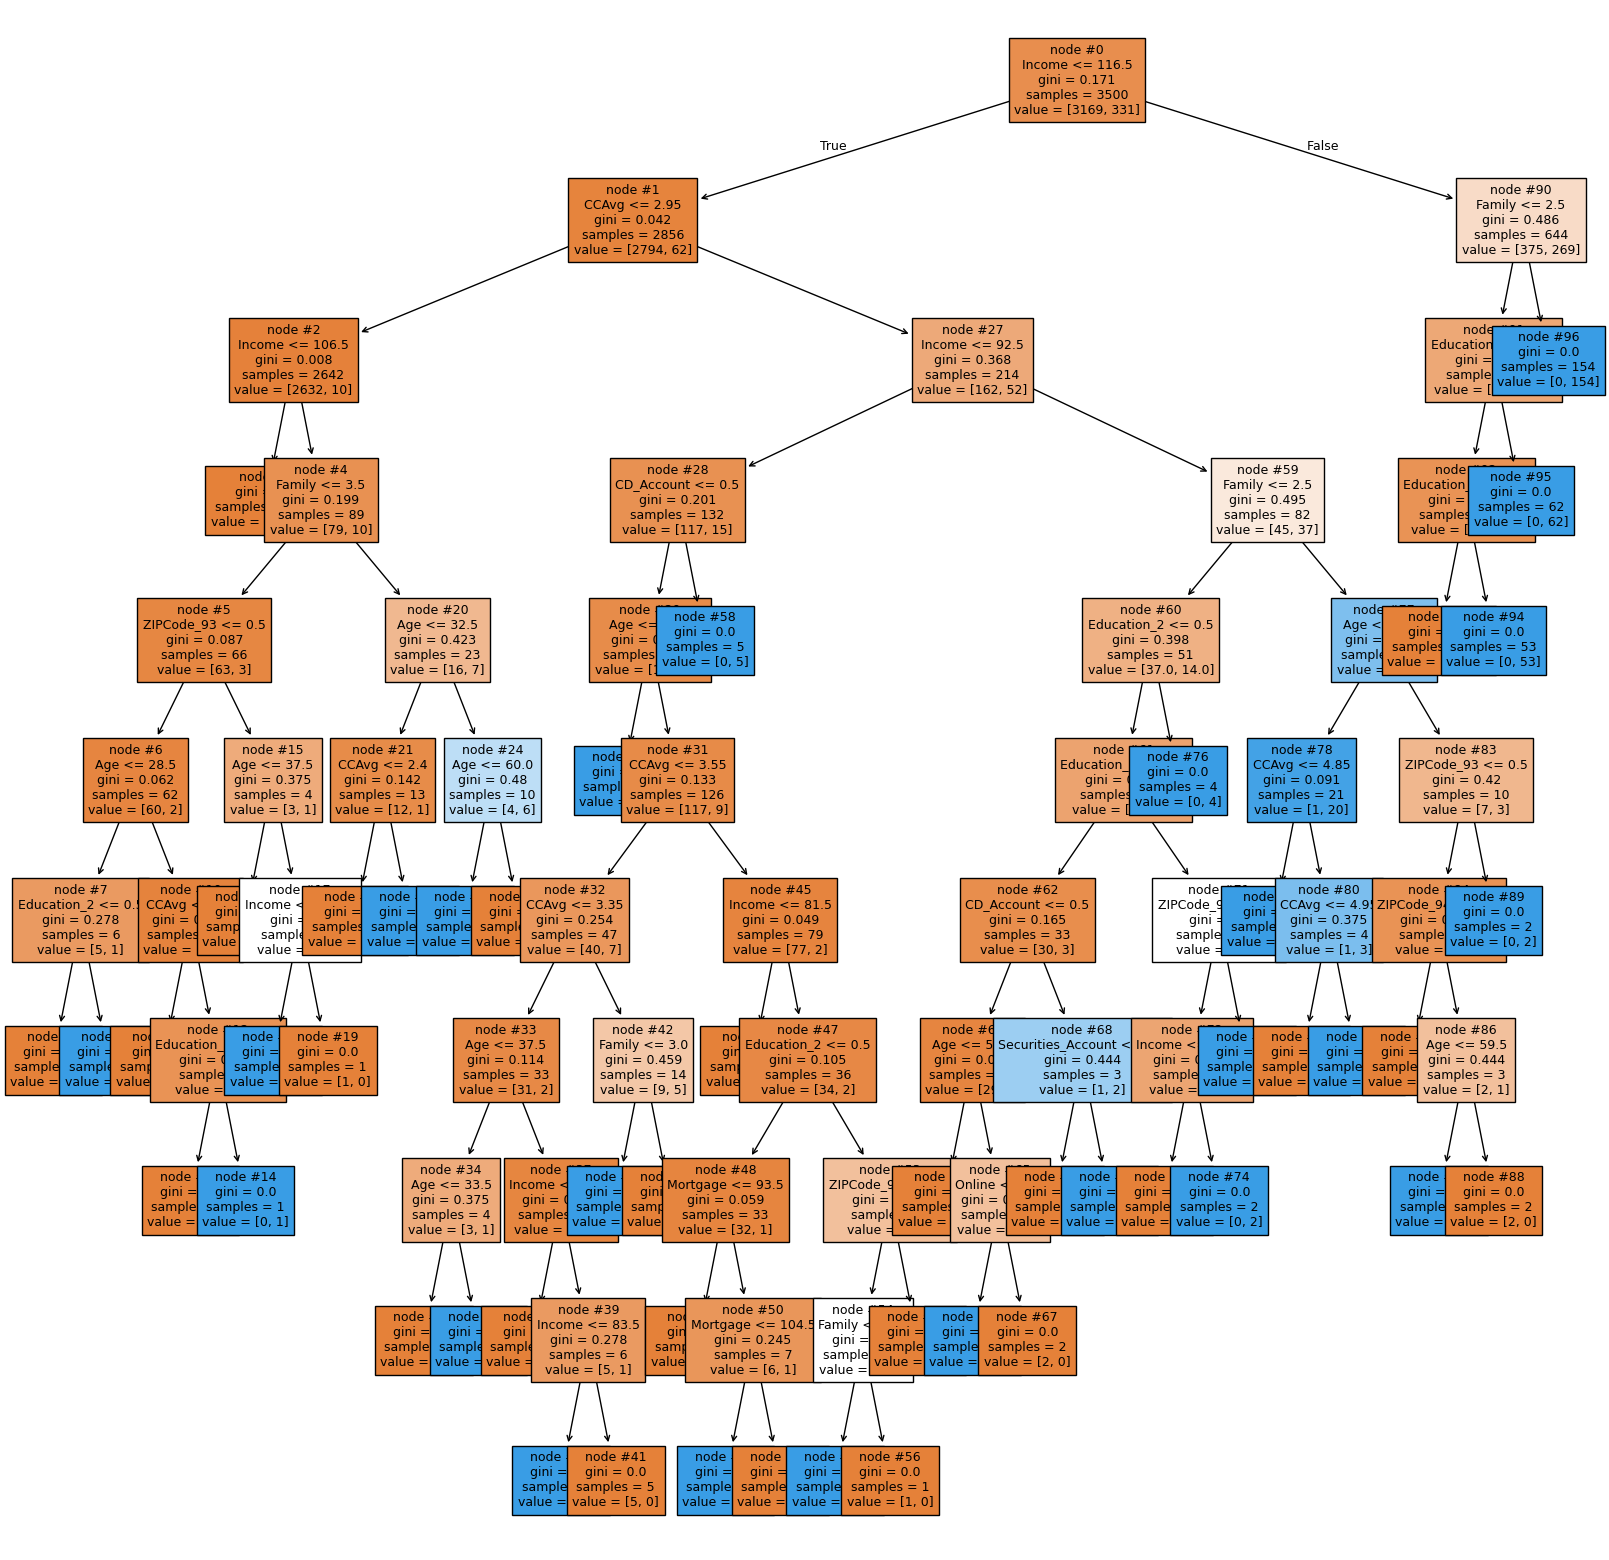

In [160]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    model,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=True,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()



*   We can observe that this is a very complex tree.
*   The default decision tree model overfits the data which is resulting in highest score for  precision, recall, accuracy and f1, also for testing set performance is high due to overfitting the model



In [161]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        model,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- Age <= 37.50

### Decision Tree (with class_weights)

* As the frequency of class 1 is 10% and the frequency of class 0 is 90%, then class 0 will become the dominant class and the decision tree will become biased toward the dominant classes

* In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data

In [162]:
model1 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

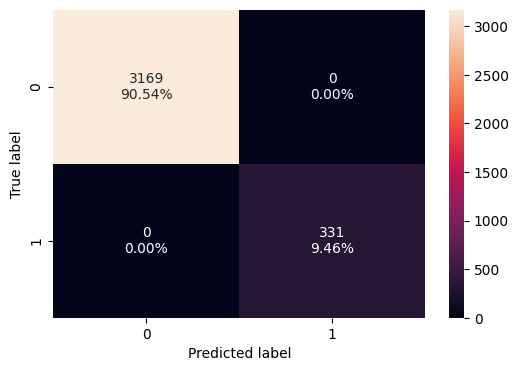

In [163]:
confusion_matrix_sklearn(model1, X_train, y_train)

In [164]:
model1_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
model1_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

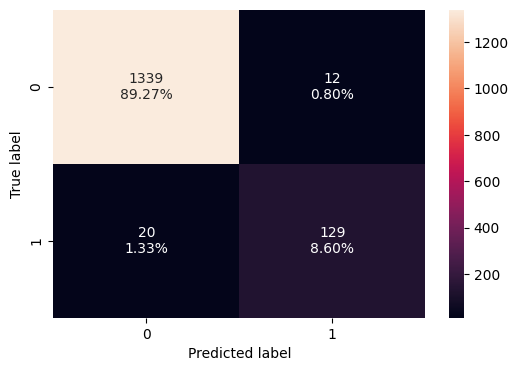

In [165]:
confusion_matrix_sklearn(model1, X_test, y_test)

In [166]:
model1_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
model1_perf_test

Accuracy    Recall  Precision        F1
0  0.978667  0.865772   0.914894  0.889655

## Model Performance Improvement

### Decision Tree Pre-prunning

In [198]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(1, 11, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                class_weight="balanced",
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                random_state=1
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 3
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 0.9530201342281879


In [199]:
model2 = best_estimator
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

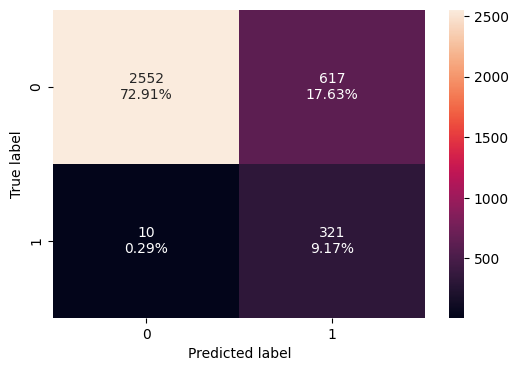

In [200]:
confusion_matrix_sklearn(model2, X_train, y_train)

In [201]:
model2_pre_perf_train = model_performance_classification_sklearn(model2, X_train, y_train)
model2_pre_perf_train

Accuracy    Recall  Precision       F1
0  0.820857  0.969789   0.342217  0.50591

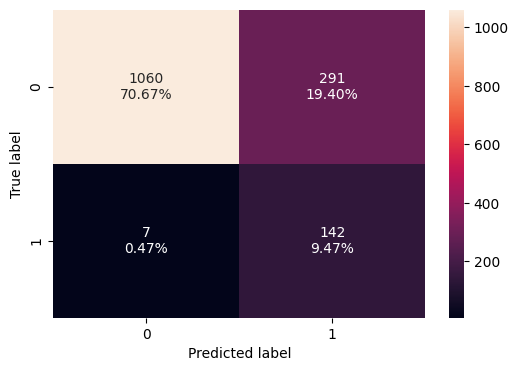

In [202]:
confusion_matrix_sklearn(model2, X_test, y_test)

In [203]:
model2_pre_perf_test = model_performance_classification_sklearn(model2, X_test, y_test)
model2_pre_perf_test

Accuracy   Recall  Precision        F1
0  0.801333  0.95302   0.327945  0.487973

* The model is giving a generalized result now since the recall scores on both the train and test data are coming to be around 0.95 which shows that the model is able to generalize well on unseen data.

In [173]:
feature_names = list(X_train.columns)
importances = model2.feature_importances_
indices = np.argsort(importances)

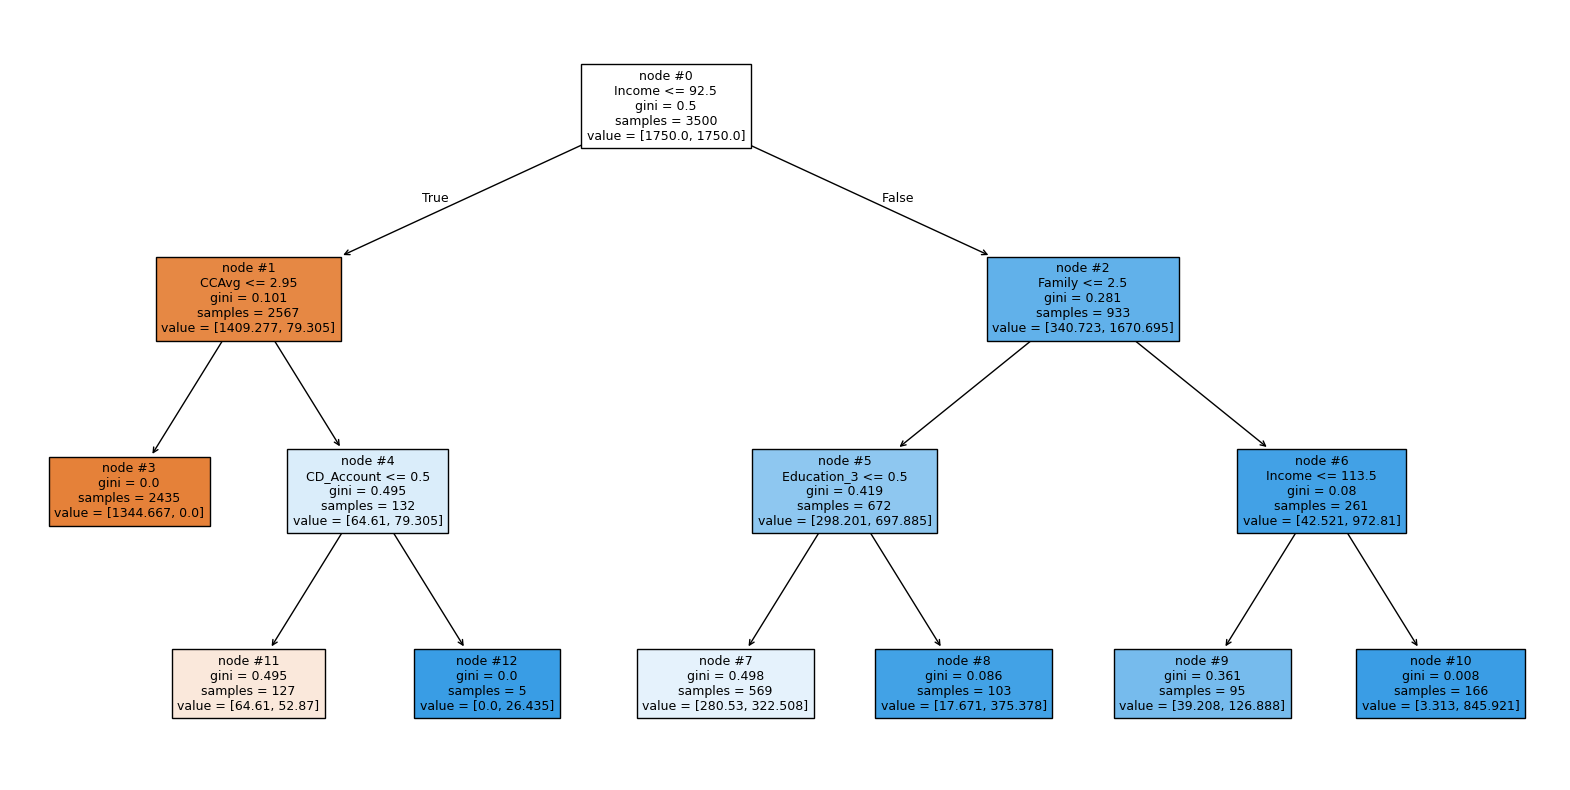

In [174]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [175]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model2, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- weights: [64.61, 52.87] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 26.44] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- weights: [280.53, 322.51] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [17.67, 375.38] class: 1
|   |--- Family >  2.50
|   |   |--- Income <= 113.50
|   |   |   |--- weights: [39.21, 126.89] class: 1
|   |   |--- Income >  113.50
|   |   |   |--- weights: [3.31, 845.92] class: 1



In [176]:
importances = model2.feature_importances_
importances

array([0.        , 0.81206256, 0.05162516, 0.06113121, 0.        ,
       0.        , 0.01010733, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.06507374])

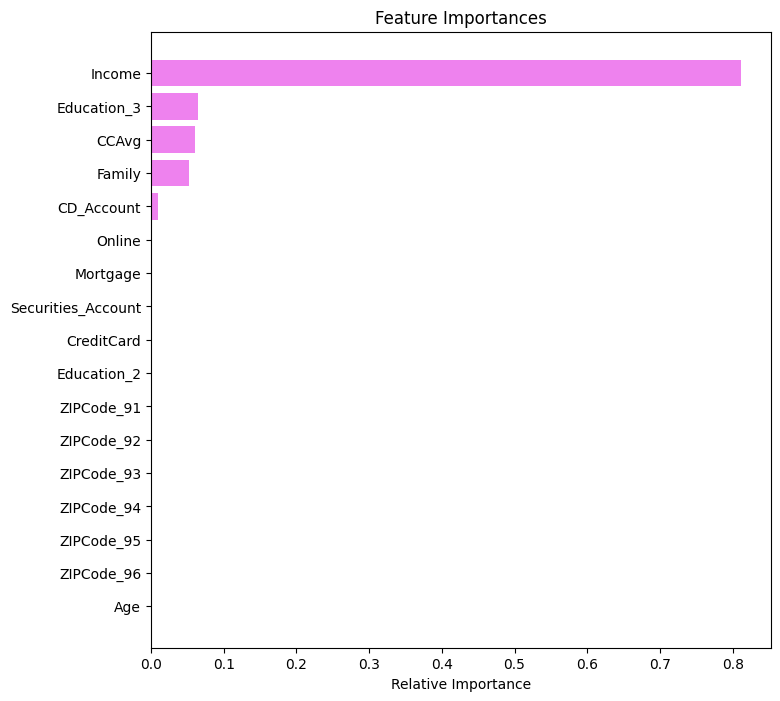

In [177]:
# importance of features in the tree building

importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Post-Pruning

In [178]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [179]:
pd.DataFrame(path)

ccp_alphas    impurities
0   0.000000e+00 -7.759588e-16
1   3.853725e-19 -7.755734e-16
2   4.729571e-19 -7.751004e-16
3   5.255079e-19 -7.745749e-16
4   5.255079e-19 -7.740494e-16
5   7.707449e-19 -7.732787e-16
6   1.051016e-18 -7.722277e-16
7   1.576524e-18 -7.706511e-16
8   1.257806e-17 -7.580731e-16
9   1.524700e-04  3.049400e-04
10  1.567552e-04  6.184504e-04
11  2.761014e-04  1.170653e-03
12  2.857143e-04  1.456367e-03
13  3.036629e-04  2.367356e-03
14  3.090999e-04  2.676456e-03
15  4.498426e-04  3.576141e-03
16  4.663329e-04  4.975140e-03
17  4.714887e-04  6.861095e-03
18  5.517639e-04  7.412859e-03
19  5.900285e-04  8.002887e-03
20  6.292497e-04  9.261386e-03
21  6.616439e-04  1.058467e-02
22  7.538167e-04  1.133849e-02
23  7.580649e-04  1.285462e-02
24  8.728080e-04  1.634585e-02
25  8.981804e-04  1.724403e-02
26  9.269294e-04  1.817096e-02
27  1.461815e-03  1.963278e-02
28  1.768018e-03  2.140080e-02
29  1.981730e-03  2.536426e-02
30  2.150414e-03  2.751467e-02
31  2.375809e-03  2.989048e-02
32  2.472660e-03  3.483580e-02
33  3.297255e-03  3.813305e-02
34  3.344493e-03  4.147755e-02
35  3.503794e-03  4.498134e-02
36  3.602932e-03  5.218720e-02
37  3.729690e-03  5.591689e-02
38  4.941457e-03  6.085835e-02
39  4.970987e-03  7.080032e-02
40  2.255792e-02  9.335825e-02
41  3.708749e-02  2.046207e-01
42  2.953793e-01  5.000000e-01

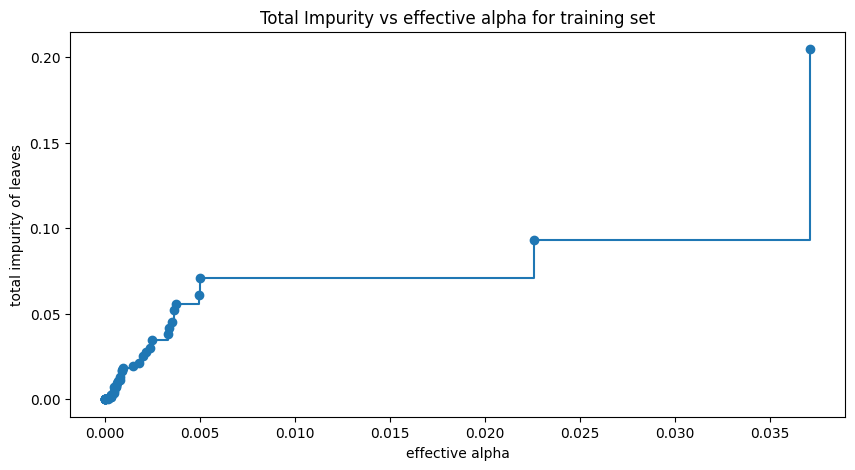

In [180]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [181]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2953792759992314


For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

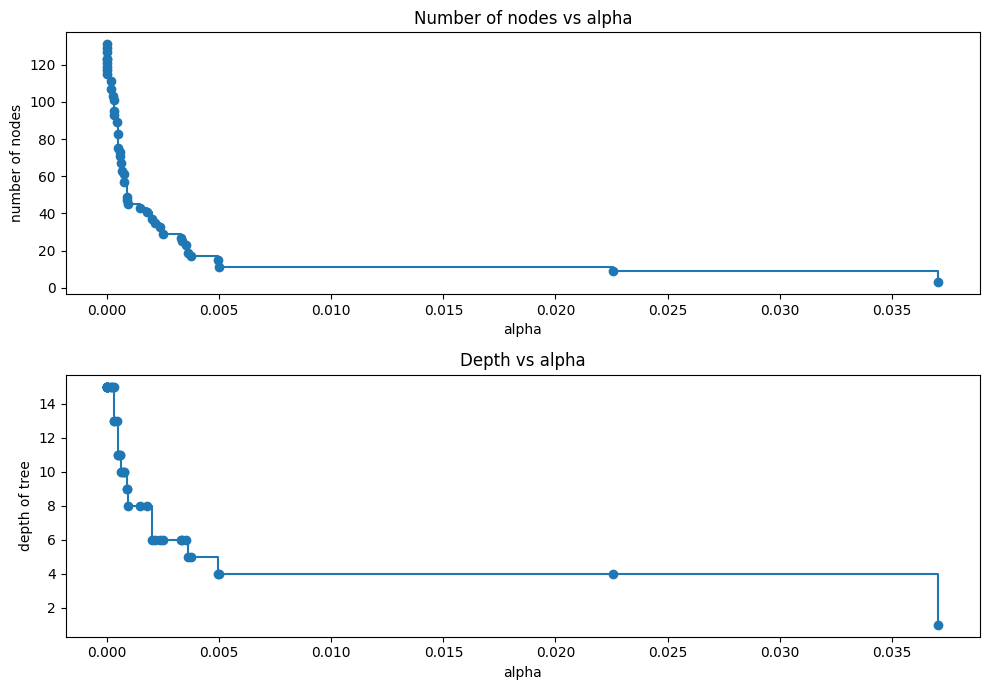

In [182]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [183]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [184]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [185]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

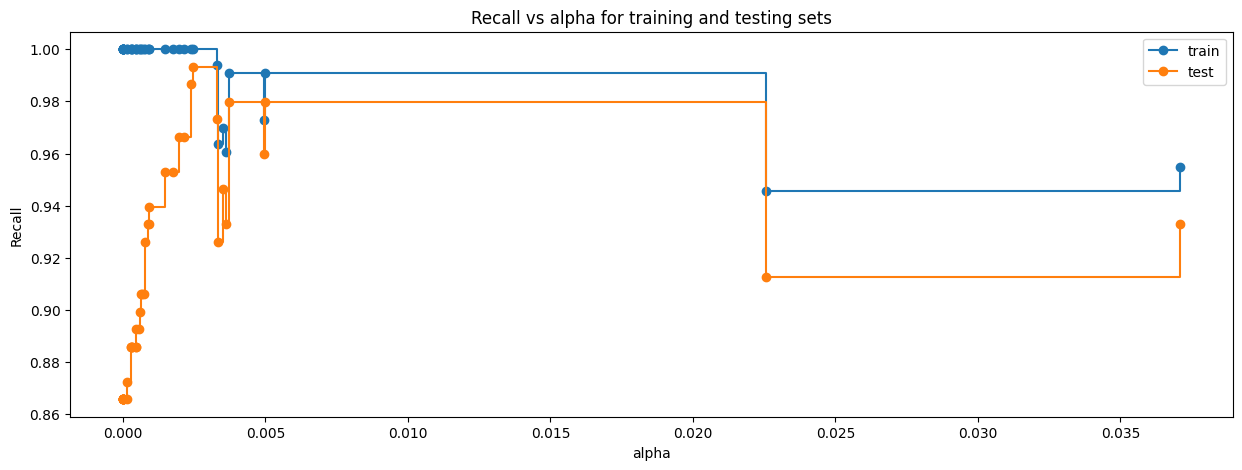

In [186]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [187]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0024726598786422157, class_weight='balanced',
                       random_state=1)


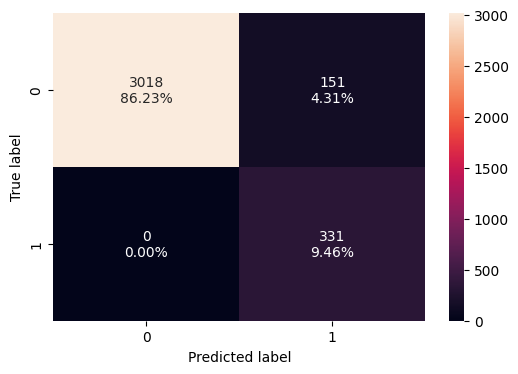

In [188]:
model3 = best_model
confusion_matrix_sklearn(model3, X_train, y_train)

In [189]:
model3_post_perf_train = model_performance_classification_sklearn(
    model3, X_train, y_train
)
model3_post_perf_train

Accuracy  Recall  Precision        F1
0  0.956857     1.0   0.686722  0.814268

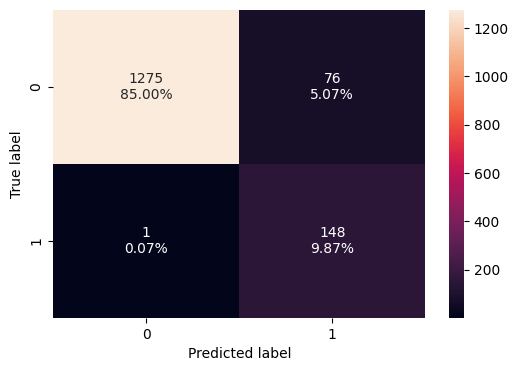

In [190]:
confusion_matrix_sklearn(model3, X_test, y_test)

In [191]:
model3_post_perf_test = model_performance_classification_sklearn(
    model3, X_test, y_test
)
model3_post_perf_test

Accuracy    Recall  Precision        F1
0  0.948667  0.993289   0.660714  0.793566

In the post-pruned tree also, the model is giving a generalized result since the recall scores on both the train and test data are coming to be around 1 which shows that the model is able to generalize well on unseen data.

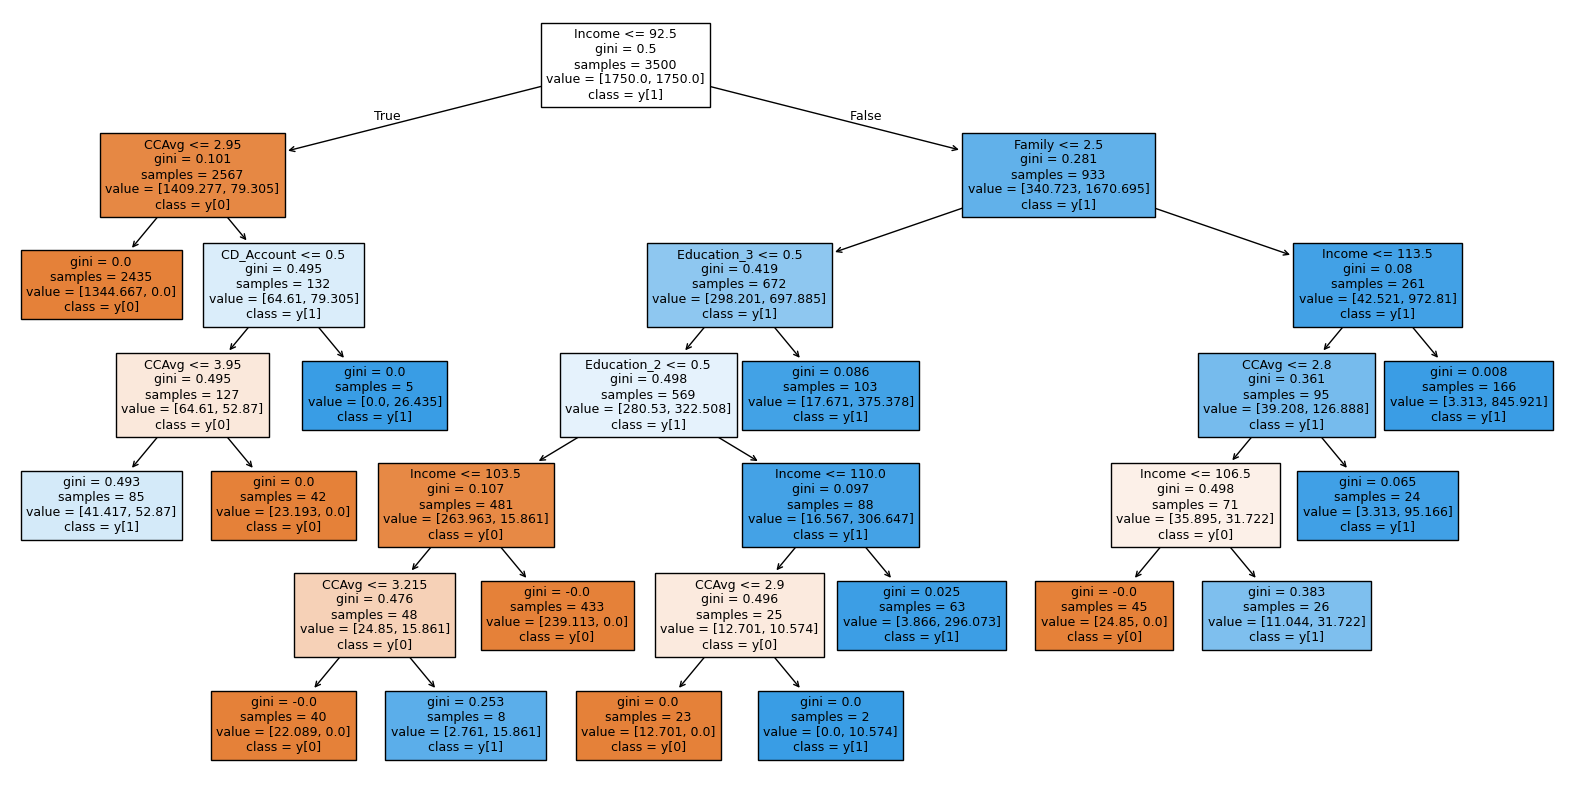

In [192]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    model3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [193]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model3, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [41.42, 52.87] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [23.19, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 26.44] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- Income <= 103.50
|   |   |   |   |   |--- CCAvg <= 3.21
|   |   |   |   |   |   |--- weights: [22.09, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.21
|   |   |   |   |   |   |--- weights: [2.76, 15.86] class: 1
|   |   |   |   |--- Income >  103.50
|   |   |   |   |   |--- weights: [239.11, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- Income <= 110.00
|   |   |   |   |   |--- CCAvg <= 2.90
|   |   |   |   |   |   |--- weights: [12

In [194]:
importances = model3.feature_importances_
indices = np.argsort(importances)

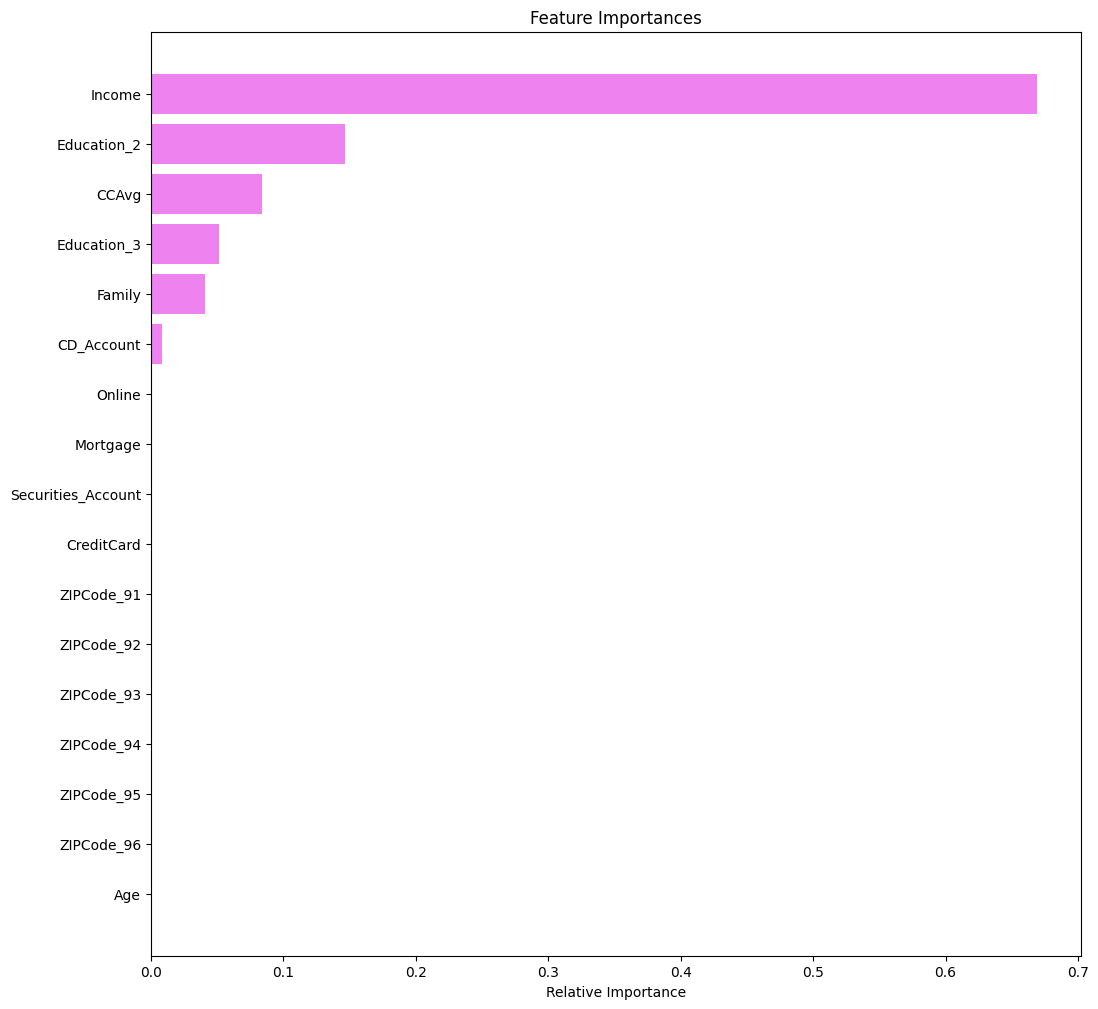

In [195]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


*   Income, Education, CCAvg, Family are the important feature for the post pruned tree



## Model Performance Comparison and Final Model Selection

##### Training performance comparision

In [196]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        default_decision_tree_perf_train.T,
        model1_perf_train.T,
        model2_pre_perf_train.T,
        model3_post_perf_train.T,

    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree (sklearn default)  Decision Tree with class_weight  \
Accuracy                               1.0                              1.0   
Recall                                 1.0                              1.0   
Precision                              1.0                              1.0   
F1                                     1.0                              1.0   

           Decision Tree (Pre-Pruning)  Decision Tree (Post-Pruning)  
Accuracy                      0.820857                      0.956857  
Recall                        0.969789                      1.000000  
Precision                     0.342217                      0.686722  
F1                            0.505910                      0.814268

In [197]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
       default_decision_tree_perf_test.T,
       model1_perf_test.T,
       model2_pre_perf_test.T,
       model3_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree (sklearn default)  Decision Tree with class_weight  \
Accuracy                          0.986000                         0.978667   
Recall                            0.932886                         0.865772   
Precision                         0.926667                         0.914894   
F1                                0.929766                         0.889655   

           Decision Tree (Pre-Pruning)  Decision Tree (Post-Pruning)  
Accuracy                      0.801333                      0.948667  
Recall                        0.953020                      0.993289  
Precision                     0.327945                      0.660714  
F1                            0.487973                      0.793566

*  Both the pre-pruned and post-pruned decision trees exhibit generalized performances.
*  The post-prunned decision tree model performs much better with a recall score of 0.99, Precision 0.66, F1 score of 0.79 , and an accuracy of 0.94
*  Based on metrics as well as post prunned tree uses a few more features for decision making. this will likely to yeild better results on unseen data.
*  We **recommend the post-prunned decision tree model to the business** To provide an accurate prediction of customers who will accept personal loan,

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

*  Income and Education are most influential variable in predicting if a customer will accept a Personal loan or not
*  CCAvg, Family and CD_account are next following important variables
*  Customer with age of 35 to 45 and family sizes 2 and abov with education level graduate and above are good target for personal loan
*  As per the decision tree customers with income greater than 92K, Families with members 2 or more and CCAVg above 2k are more likely to be target customers to accept personal loan.
*  Customers with mortgages of above 100k USD can also be a good target for loan due too loan repayment installments overburden the budget they might opt for personal loan.
*  The bank should use more data for the analysis to get more reliable results
*  The bank can try more new combination of variables in the interest of improving the model continously

___

In [204]:
!jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/AIMLCourse/Machine_Learning/Project02/AIML_ML_Project_full_code_notebook.ipynb' --output-dir '/content/drive/MyDrive/Colab Notebooks/AIMLCourse/Machine_Learning/Project02'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/AIMLCourse/Machine_Learning/Project02/AIML_ML_Project_full_code_notebook.ipynb to html
[NbConvertApp] Writing 5284135 bytes to /content/drive/MyDrive/Colab Notebooks/AIMLCourse/Machine_Learning/Project02/AIML_ML_Project_full_code_notebook.html
